
# Problem Statement

##### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)

# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# 1. Data Sourcing

Load the data set from a csv to a dataframe and observe the demographics of the data.

In [2]:
# Read the Data into a DataFrame
leads = pd.read_csv('leads.csv')

In [3]:
# Shape of Dataframe

leads.shape

(9240, 37)

In [4]:
# See the datatypes of columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# 2. Exploratory Data Analysis

Perfrom EDA on the loaded data. EDA includes below actions
1. Null/Missing Values Treatment
2. Outliers Treatment
3. Correlation Identification
4. Univariate, Bivariate and Multivariate Analysis

In [7]:
# Check Data Imbalance
leads['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [8]:
# Check Data Imbalance
leads['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

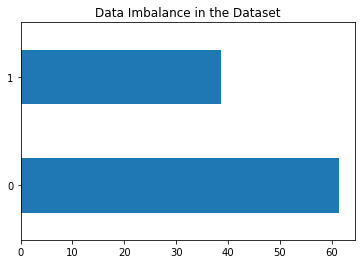

In [9]:
# Plot Data Imbalance
(leads['Converted'].value_counts(normalize=True)*100).plot.barh()
plt.title('Data Imbalance in the Dataset')
plt.show()

There is no data imblance here. Out of 100% ~61% are not converted and ~39% are converted.

As we saw in the dataframe head there are columns with "Select" as a value. This is because the default value in the dropdown for that field is "Select" and the user did not select any value for those fields/features.

These values can be considered as null values.
Let us first replace these values with null.

In [10]:
leads.replace("Select",np.nan,inplace=True)

In [11]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
# Check for null values
round((leads.isnull().sum()/leads.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

How did you hear about X Education, Lead Profile are columns with highest null values

In [13]:
# How did you hear about X Education

leads['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [14]:
# Lead Profile
leads['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

As the number of null values are high for above two columns, we decided to drop them from the dataframe

In [15]:
# Dropping Lead Profile and How did you hear about X Education

leads.drop(['How did you hear about X Education','Lead Profile'], axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

- We have two columns here Tags and Lead Quality. These columns are filled after conversation with the leads. Hence we will remove these 2 columns.
- Last Notable Activity is an intermediate column which is an update while the sales team representative is in touch with the lead. Hence we will remove Last Notable Activity Column.

In [16]:
leads.drop(columns=['Tags','Lead Quality','Last Notable Activity'], inplace=True)

In [17]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [18]:
# Null values count again
round((leads.isnull().sum()/leads.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Let us see columns with 45% null values.

In [19]:
leads['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [20]:
leads['Asymmetrique Activity Index'].value_counts(dropna=False)

NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [21]:
leads['Asymmetrique Activity Score'].unique()

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [22]:
leads['Asymmetrique Activity Score'].value_counts(dropna=False)

NaN     4218
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [23]:
leads['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [24]:
leads['Asymmetrique Profile Index'].value_counts(dropna=False)

NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [25]:
leads['Asymmetrique Profile Score'].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

In [26]:
leads['Asymmetrique Profile Score'].value_counts(dropna=False)

NaN     4218
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [27]:
leads[pd.isnull(leads['Asymmetrique Activity Index'])]['Converted'].value_counts()

0    2565
1    1653
Name: Converted, dtype: int64

In [28]:
leads[pd.isnull(leads['Asymmetrique Activity Score'])]['Converted'].value_counts()

0    2565
1    1653
Name: Converted, dtype: int64

In [29]:
leads[pd.isnull(leads['Asymmetrique Profile Index'])]['Converted'].value_counts()

0    2565
1    1653
Name: Converted, dtype: int64

In [30]:
leads[pd.isnull(leads['Asymmetrique Profile Score'])]['Converted'].value_counts()

0    2565
1    1653
Name: Converted, dtype: int64

From the above analysis on the four columns that have ~45% null values, we can clearly observe that all columns have 4218 null values. 

In all those columns we have exactly 1653 leads which are converted and 2565 which are not converted.

We can remove these columns as there are high null values and we cannot impute the index or score for profile and index based on the given values. 

Also almost half of the data is having nulls for these columns. Hence decided to remove them.

In [31]:
leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'], axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [32]:
# Null values count in leads Again!!
round((leads.isnull().sum()/leads.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Let us look into the null values for Country, City and Specialization

In [33]:
# Country

leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Germany                    4
South Africa               4
Kuwait                     4
Nigeria                    4
Sweden                     3
Bangladesh                 2
Philippines                2
Italy                      2
China                      2
Netherlands                2
Asia/Pacific Region        2
Belgium                    2
Uganda                     2
Ghana                      2
Sri Lanka                  1
Switzerland                1
Tanzania                   1
Liberia                    1
Vietnam                    1
Denmark       

As Majority of the leads are from India, we will confidently replce the null values with India

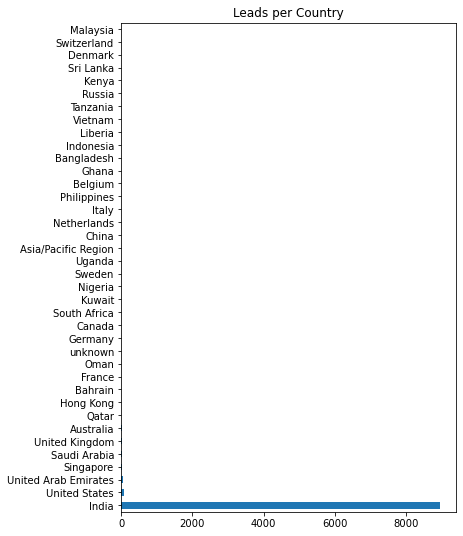

In [34]:
# Plot a bar chart for Country
leads['Country'] = np.where(pd.isnull(leads['Country']),'India',leads['Country'])
plt.figure(figsize=(6,9))
leads['Country'].value_counts(dropna=False).plot.barh()
plt.title('Leads per Country')
plt.show()

In [35]:
leads['Country'].value_counts(normalize=True, dropna=False)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Germany                  0.043290
Canada                   0.043290
South Africa             0.043290
Kuwait                   0.043290
Nigeria                  0.043290
Sweden                   0.032468
Uganda                   0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Netherlands              0.021645
Italy                    0.021645
Philippines              0.021645
Belgium                  0.021645
Ghana                    0.021645
Bangladesh               0.021645
Indonesia                0.010823
Liberia       

Before replacing the null values with India, we have about ~76% of values as India in Country column. Adter replacing ~96% of values are India
So we can see that the company X-Education has major customer base in India. 
hence there is no point in having this column here. We will remove the same.

In [36]:
leads.drop('Country', axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [37]:
# City
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

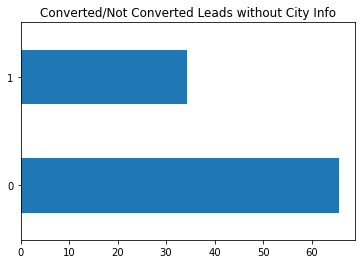

In [38]:
(leads[pd.isnull(leads['City'])]['Converted'].value_counts(normalize=True)*100).plot.barh()
plt.title('Converted/Not Converted Leads without City Info')
plt.show()

We have already removed the Country Parameter as more than ~75% leads are from India.
For the City information, we can see that ~35% of leads without City Info are converted.
Hence to have a geographical analysis in the model, we will not remove the City field.
We will impute the missing values of the City with Not Updated.

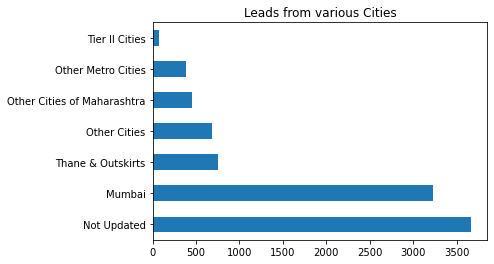

In [39]:
leads['City'] = np.where(pd.isnull(leads['City']),'Not Updated',leads['City'])
leads['City'].value_counts(dropna=False).plot.barh()
plt.title('Leads from various Cities')
plt.show()

In [40]:
# Specialization Column
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

These NaN values are nothing but the "Select" value in dropdown. User might not have selected these Specializations because of predominantly 2 reasons:
1. Required Specialization Type not available.
2. Since this is an optional column, user might have left it purposefully
Let us update the null values Specialization column with Not Selected.

In [41]:
leads['Specialization'] = np.where(pd.isnull(leads['Specialization']), "Not Selected", leads['Specialization'])

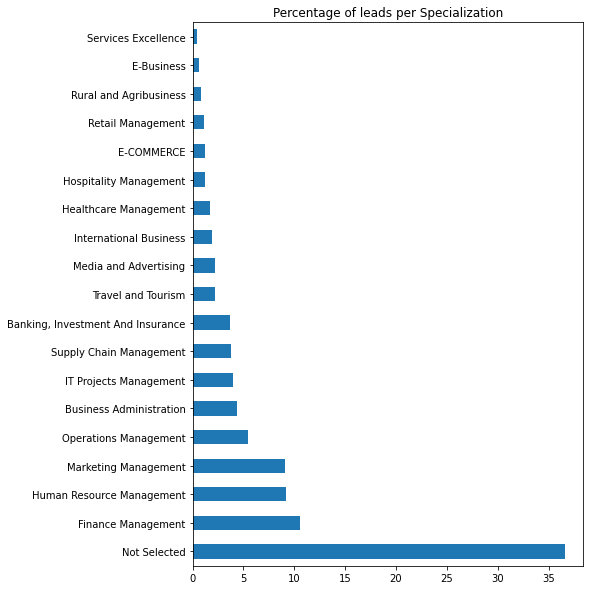

In [42]:
plt.figure(figsize=(7,10))
(leads['Specialization'].value_counts(normalize=True, dropna=False)*100).plot.barh()
plt.title('Percentage of leads per Specialization')
plt.show()

In [43]:
# What is your current occupation
leads['What is your current occupation'].value_counts(dropna=False, normalize=True)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

As 60% of the values are 'Unemployed'. We will replace the null values with Unemployed

In [44]:
leads['What is your current occupation'] = np.where(pd.isnull(leads['What is your current occupation']),'Unemployed',leads['What is your current occupation'])

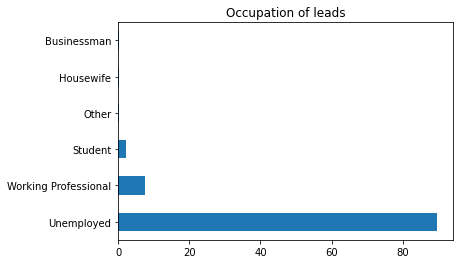

In [45]:
(leads['What is your current occupation'].value_counts(normalize=True, dropna=False)*100).plot.barh()
plt.title('Occupation of leads')
plt.show()

In [46]:
#What matters most to you in choosing a course
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [47]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

As ~70% of the values are Better Career Prospects we will replace the NaN value with the same.

In [48]:
leads['What matters most to you in choosing a course'] = np.where(pd.isnull(leads['What matters most to you in choosing a course']),'Better Career Prospects',leads['What matters most to you in choosing a course'])

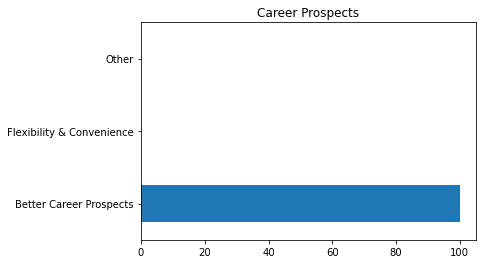

In [49]:
(leads['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True)*100).plot.barh()
plt.title('Career Prospects')
plt.show()

As almost 100% of the values have Better Career Prospects we can remove this column

In [50]:
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [51]:
# Null values count in leads Again
round((leads.isnull().sum()/leads.shape[0])*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

Let us look at the null values for other columns TotalVisits, Page Views Per Visit, Last Activity, Lead Source

In [52]:
# TotalVisits
leads['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [53]:
# See the details about the column
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [54]:
# Find the mode
leads['TotalVisits'].mode()

0    0.0
dtype: float64

Trying to identify the relation between TotalVisits and any other column

In [55]:
# See the crrelation of the data frame 
leads.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.022223,0.020329,0.058808
Converted,0.025157,1.000000,0.030395,0.362483,-0.003328
TotalVisits,0.022223,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.020329,0.362483,0.221240,1.000000,0.320361
Page Views Per Visit,0.058808,-0.003328,0.512125,0.320361,1.000000


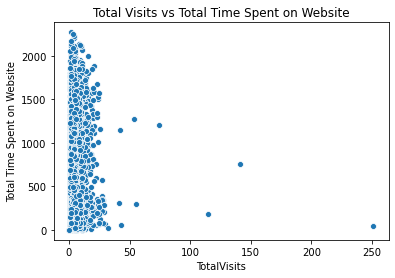

In [56]:
# See the relation between total visits and total time spent on website
sns.scatterplot(x='TotalVisits',y='Total Time Spent on Website', data=leads)
plt.title('Total Visits vs Total Time Spent on Website')
plt.show()

We can see that for even a single visit also the lead might have spent a lot of time on website. Hence we cannot imply something from this relation

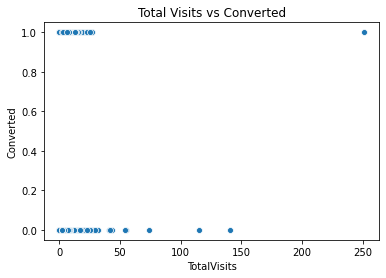

In [57]:
# PLot TotalVisits vs Converted
sns.scatterplot(x='TotalVisits',y='Converted', data=leads)
plt.title('Total Visits vs Converted')
plt.show()

We can see that above ~30 for Total Visits only one lead has converted.

In [58]:
# Converted Value Counts where TotalVisits > 30
leads[leads['TotalVisits']>30]['Converted'].value_counts()

0    9
1    1
Name: Converted, dtype: int64

In [59]:
# Converted value counts where TotalVisits is null
leads[pd.isnull(leads['TotalVisits'])]['Converted'].value_counts()

1    100
0     37
Name: Converted, dtype: int64

In [60]:
# Converted Value Counts for all TotalVisits values where TotalVisits < 30
leads[leads['TotalVisits']<=30].groupby('TotalVisits')['Converted'].value_counts()

TotalVisits  Converted
0.0          0            1273
             1             916
1.0          0             335
             1              60
2.0          0            1143
             1             537
3.0          0             820
             1             486
4.0          0             672
             1             448
5.0          0             467
             1             316
6.0          0             288
             1             178
7.0          0             187
             1             122
8.0          0             121
             1             103
9.0          0              91
             1              73
10.0         0              57
             1              57
11.0         1              48
             0              38
12.0         0              27
             1              18
13.0         0              25
             1              23
14.0         1              21
             0              15
15.0         0              11
             1  

- For totalVisits greater than 30 only one lead converted.
- For the leads which have total visits as null 100 are converted and 37 are not. That means around 27% are not converted.i.e. 73% are converted.
- In the above output where we are printing the converted/not converted counts for totalvisits less than 30 we found the similar ratio between converted for totalvisits = 2. Here 31% are not converted(69% Converted) which is closer to the missing values scenario.

- Hence we will replace the missing values of totalvisits with 2.

In [61]:
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [62]:
# Replacing the null values with 2
leads['TotalVisits'] = np.where(pd.isnull(leads['TotalVisits']),2,leads['TotalVisits'])

In [63]:
# Checking the null values
leads['TotalVisits'].isnull().sum()

0

In [64]:
# Page Views Per Visit
leads['Page Views Per Visit'].isnull().sum()

137

In [65]:
# Describe
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [66]:
leads['Page Views Per Visit'].mode()

0    0.0
dtype: float64

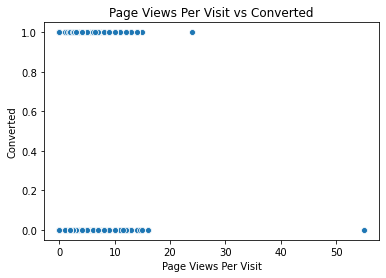

In [67]:
# Converted Value counts for Page Views Per Visit 
sns.scatterplot(x=leads['Page Views Per Visit'],y=leads['Converted'])
plt.title('Page Views Per Visit vs Converted')
plt.show()

Only couple of leads having Page Views Per Visit more than 15 are converted.

In [68]:
# Value counts of Converted for Page Views Per Visit = null
leads[pd.isnull(leads['Page Views Per Visit'])]['Converted'].value_counts()

1    100
0     37
Name: Converted, dtype: int64

In [69]:
leads[leads['Page Views Per Visit']<15].groupby('Page Views Per Visit')['Converted'].value_counts()

Page Views Per Visit  Converted
0.00                  0            1273
                      1             916
1.00                  0             472
                      1             179
1.14                  0               1
                                   ... 
13.00                 0               4
                      1               2
14.00                 1               6
                      0               3
14.50                 0               1
Name: Converted, Length: 169, dtype: int64

In [70]:
# Ratio of Converted vs not Converted for Page Views Per Visit = 1.00
round(179/(472+179)*100,2)

27.5

This value is again 27.5% which is ~= ratio of converted vs not converted for page views = null.
Hence we will replace the null values with 1.00

In [71]:
leads['Page Views Per Visit'] = np.where(pd.isnull(leads['Page Views Per Visit']),1.00,leads['Page Views Per Visit'])

In [72]:
leads['Page Views Per Visit'].describe()

count    9240.000000
mean        2.342614
std         2.151647
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Column Description did not change after null value imputation

In [73]:
round(leads.isnull().sum()/leads.shape[0]*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [74]:
# Dealing with null values for Last Activity
leads['Last Activity'].isnull().sum()

103

In [75]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [76]:
leads[pd.isnull(leads['Last Activity'])]['Converted'].value_counts(normalize=True)*100

1    78.640777
0    21.359223
Name: Converted, dtype: float64

In [77]:
leads.groupby('Last Activity')['Converted'].value_counts(normalize=True, dropna=False)*100

Last Activity                 Converted
Approached upfront            1            100.000000
Converted to Lead             0             87.383178
                              1             12.616822
Email Bounced                 0             92.024540
                              1              7.975460
Email Link Clicked            0             72.659176
                              1             27.340824
Email Marked Spam             1            100.000000
Email Opened                  0             63.543788
                              1             36.456212
Email Received                1            100.000000
Form Submitted on Website     0             75.862069
                              1             24.137931
Had a Phone Conversation      1             73.333333
                              0             26.666667
Olark Chat Conversation       0             91.366906
                              1              8.633094
Page Visited on Website       0           

For the Last Activity Page Visited on Website the converted vs not converted ratio is similar to Last Activity=null. Hence we will impute the null values with Page Visited on Website

In [78]:
leads['Last Activity'] = np.where(pd.isnull(leads['Last Activity']),'Page Visited on Website',leads['Last Activity'])

In [79]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          743
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

The order remains the same.

In [80]:
# Null value handling for Lead Source
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
youtubechannel          1
blog                    1
Pay per Click Ads       1
NC_EDM                  1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

As there are very less null values. We will replace them with Google.

In [81]:
leads['Lead Source'] = np.where(pd.isnull(leads['Lead Source']),'Google',leads['Lead Source'])

In [82]:
leads['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
NC_EDM                  1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

In [83]:
# Final Check for null values
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

We have completed dealing with null values.
Now let us look at the numeric columns and perform below tasks.
- Convert to appropriate datatype
- Check for Outliers and treat the same

In [84]:
# Checking for column datatypes
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

There are 3 columns to deal with
- Total Time Spent of Website
- TotalVisits
- Page Views Per Visit

In [85]:
# Total Time Spent of Website
leads['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

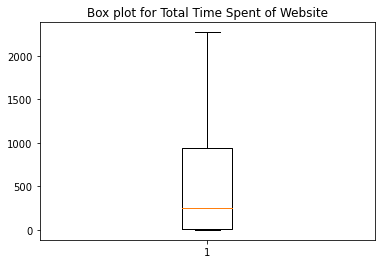

In [86]:
# plot a box plot.
# plt.figure(figsize=(7,4))
plt.boxplot(leads['Total Time Spent on Website'])
plt.title('Box plot for Total Time Spent of Website')
plt.show()

In [87]:
# Total Visits
leads['TotalVisits'].describe()

count    9240.000000
mean        3.423810
std         4.821888
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [88]:
# COnvert the values in TotalVisits to int

leads['TotalVisits'] = leads['TotalVisits'].astype(int)

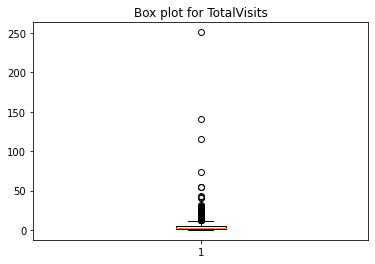

In [89]:
# plot a box plot.
plt.boxplot(leads['TotalVisits'])
plt.title('Box plot for TotalVisits')
plt.show()

In [90]:
# See the Quantiles
leads['TotalVisits'].quantile([0.25,0.5,0.75,0.9,0.95,0.99,1])

0.25      1.0
0.50      3.0
0.75      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [91]:
# Calculate Q3
Q3 = leads['TotalVisits'].quantile(0.75)

In [92]:
# Calculate Upper Limit in the Box Plot
UL = Q3+1.5*Q3
UL

12.5

We have decided to cap the upper outliers with the upper limit value 12.5 ~= 12

In [93]:
leads['TotalVisits'] = np.where(leads['TotalVisits']>UL, 12, leads['TotalVisits'])

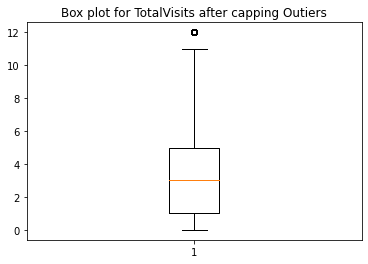

In [94]:
#Plot the the TotalVisits column
plt.boxplot(leads['TotalVisits'])
plt.title('Box plot for TotalVisits after capping Outiers')
plt.show()

In [95]:
# Outliers handling for the column Page Views Per Visit
leads['Page Views Per Visit'].describe()

count    9240.000000
mean        2.342614
std         2.151647
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

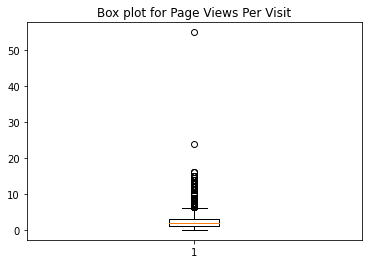

In [96]:
# Plot a box plot for Page Views Per Visit
plt.boxplot(leads['Page Views Per Visit'])
plt.title('Box plot for Page Views Per Visit')
plt.show()

In [97]:
leads['Page Views Per Visit'].quantile([0.5,0.75,0.95,0.99])

0.50    2.0
0.75    3.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [98]:
# Calculate the Upper Limit i.e. Q3+1.5*Q3
Q3 = leads['Page Views Per Visit'].quantile(0.75)
UL= Q3+1.5*Q3
UL

7.5

In [99]:
leads[leads['Page Views Per Visit'] > UL]['Page Views Per Visit'].count()

209

In [100]:
leads[leads['Page Views Per Visit'] > 6.0]['Page Views Per Visit'].count()

360

In [101]:
leads[leads['Page Views Per Visit'] > 9.0]['Page Views Per Visit'].count()

75

As the number of entries above 99%ile is very less and above 95%ile is very high, we will replace the upper cap outliers with 7.5

In [102]:
leads['Page Views Per Visit'] = np.where(leads['Page Views Per Visit']>UL,UL,leads['Page Views Per Visit'])

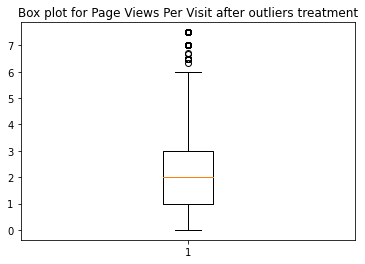

In [103]:
# Plot a box plot for Page Views Per Visit after outliers treatment
plt.boxplot(leads['Page Views Per Visit'])
plt.title('Box plot for Page Views Per Visit after outliers treatment')
plt.show()

We have completed dealing with Outliers for Numeric Columns.

Let us do some Bivariate/MultiVariate Analysis

In [104]:
# See columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [105]:
leads.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.042909,0.020329,0.057871
Converted,0.025157,1.000000,0.042389,0.362483,-0.010581
TotalVisits,0.042909,0.042389,1.000000,0.340744,0.746864
Total Time Spent on Website,0.020329,0.362483,0.340744,1.000000,0.337973
Page Views Per Visit,0.057871,-0.010581,0.746864,0.337973,1.000000


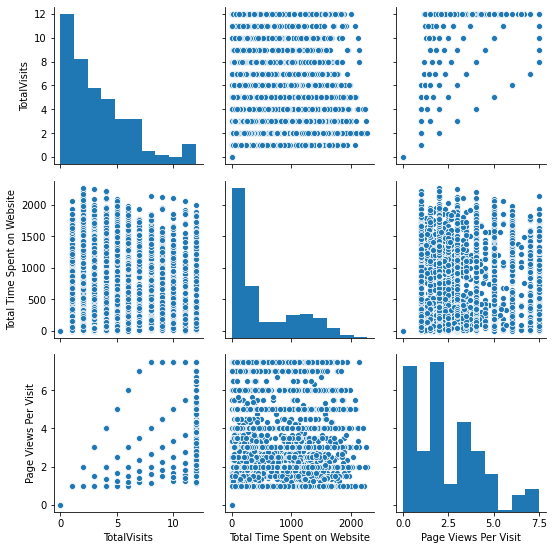

In [106]:
# Plot a pair plot for the columns 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'
sns.pairplot(leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
plt.show()

Except for TotalVisits and Page Views Per Visit there is no proper correlation among others.

- As the number of Total Visits to the website increases, the maximum number of pages viewed is increased but the minimum number of pages viewd remains same between 0-2.

Let us look at fwe columns that have Yes and No Values.

We will start with the columns 'Search','Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations'

In [107]:
def annotate_bar_graph(ax):
    for p in ax.patches:
        height = np.nan_to_num(p.get_height(), nan=0)
        ax.annotate('{0}'.format(int(float(str(height)))), (p.get_x(), height))

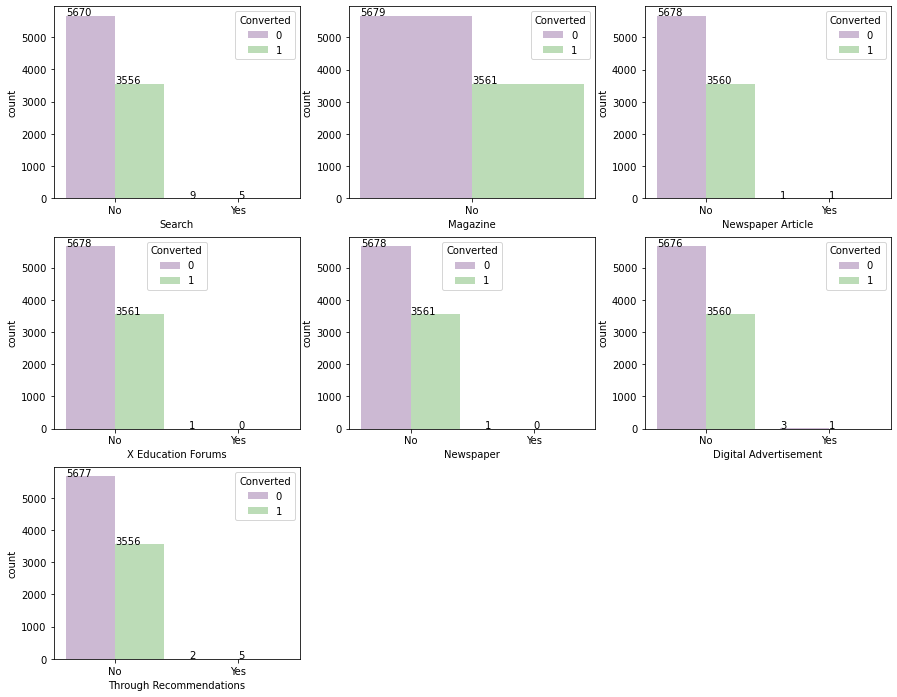

In [108]:
# PLot the Converted vs Not Converted counts for Binary Columns
labels = ['Search','Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations']
plt.figure(figsize=(15,12))
for i in enumerate(labels):
    plt.subplot(len(labels)/2,len(labels)-len(labels)/2,i[0]+1)
    ax = sns.countplot(x=i[1],hue='Converted', data=leads, palette='PRGn')
    annotate_bar_graph(ax)
plt.show()
plt.close()

- Total number of converted leads are 3561. All the leads which are converted did not see the ad in the above channels not came through any recommendations.
- Hence we will remove these columns.

In [109]:
leads.drop(columns=labels, inplace=True)

In [110]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [111]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,0,0.0,Page Visited on Website,Not Selected,Unemployed,No,No,No,Not Updated,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5,674,2.5,Email Opened,Not Selected,Unemployed,No,No,No,Not Updated,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,Email Opened,Business Administration,Student,No,No,No,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2,1428,1.0,Converted to Lead,Not Selected,Unemployed,No,No,No,Mumbai,No,No


Let us see other binary values columns like 'Do Not Email','Do Not Call','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview', 'Receive More Updates About Our Courses'.

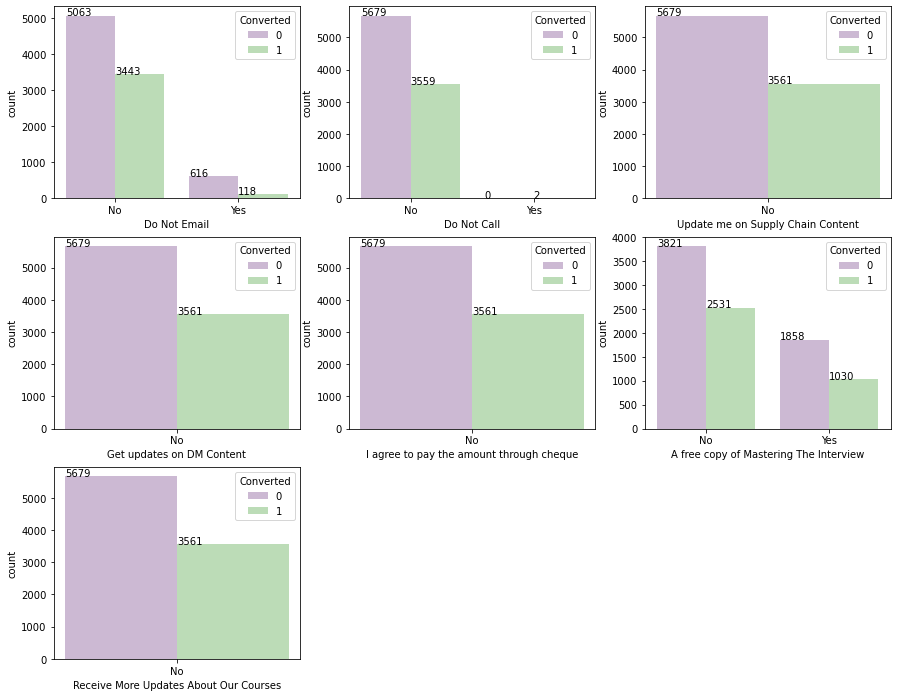

In [112]:
# PLot the Converted vs Not Converted counts for Binary Columns
labels = ['Do Not Email','Do Not Call','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Receive More Updates About Our Courses']
plt.figure(figsize=(15,12))
for i in enumerate(labels):
    plt.subplot(len(labels)/2,len(labels)-len(labels)/2,i[0]+1)
    ax = sns.countplot(x=i[1],hue='Converted', data=leads, palette='PRGn')
    annotate_bar_graph(ax)
plt.show()
plt.close()

- From the above plots we can see that columns Do Not Call, Update me on Supply Chain Content, Get Updates on DM Content, I agree to pay the amount through cheque, Receive More Updates About Our Courses have only 'No' as value for all the leads.
- Hence these columns will not add any value to out prediction and they can be removed.

In [113]:
# Dropping the columns Do Not Email, Do Not Call, Update me on Supply Chain Content, Get Updates on DM Content, I agree to pay the amount through cheque
leads.drop(columns = ['Do Not Email','Do Not Call', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','Receive More Updates About Our Courses'], inplace=True)


In [114]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview'],
      dtype='object')

In [115]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Not Updated,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,Not Selected,Unemployed,Not Updated,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Not Selected,Unemployed,Mumbai,No


Let us plot the countplot for all categorical non binary variables and see if we can reduce some categories/drop some rows.

Categorical vars: Lead Origin, Lead Source, Last Activity, Specialization, What is your current occupation, City

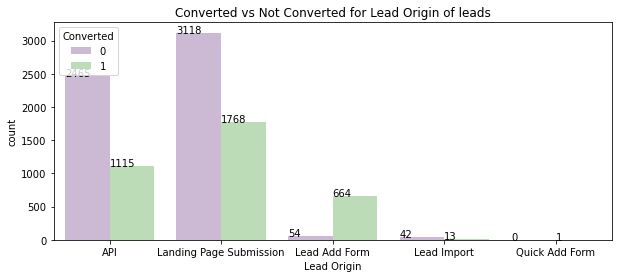

In [116]:
# See the Converted vs Not Converted for Lead Origin
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Lead Origin', hue='Converted', data=leads, palette='PRGn')
annotate_bar_graph(ax)
plt.title('Converted vs Not Converted for Lead Origin of leads')
plt.xlabel('Lead Origin')
plt.show()

In [117]:
# Lead Origin = Quick Add Form

leads[leads['Lead Origin'] == 'Quick Add Form']

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
2601,bbe44370-ea5a-4e46-99d9-d32cfbd32199,634618,Quick Add Form,Google,1,2,2217,1.0,Email Bounced,E-COMMERCE,Unemployed,Other Metro Cities,No


In [118]:
# See the value counts for Lead Source
plt.figure(figsize=(7,10))
leads['Lead Source'].value_counts(normalize=True)*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Live Chat             0.021645
Social Media          0.021645
NC_EDM                0.010823
welearnblog_Home      0.010823
testone               0.010823
Pay per Click Ads     0.010823
youtubechannel        0.010823
WeLearn               0.010823
blog                  0.010823
Name: Lead Source, dtype: float64

<Figure size 504x720 with 0 Axes>

- Google and google can be clubbed together.
- As we can see in the above column there are many categories which have less than or equal to 2% of data. 
- Hence we will replace all those categories with "Others".

In [119]:
remove_cats = ['Referral Sites',
 'Welingak Website',
 'Reference',
 'Facebook',
 'blog',
 'Pay per Click Ads',
 'bing',
 'Social Media',
 'WeLearn',
 'Click2call',
 'Live Chat',
 'welearnblog_Home',
 'youtubechannel',
 'testone',
 'Press_Release',
 'NC_EDM']

In [120]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

In [121]:
leads['Lead Source'] = leads['Lead Source'].replace(remove_cats,'Others')

In [122]:
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Others'], dtype=object)

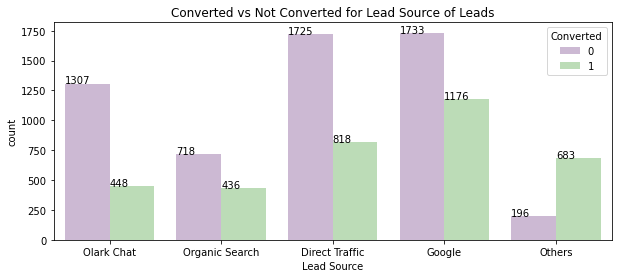

In [123]:
# See the Converted vs Not Converted for Lead Source
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Lead Source', hue='Converted', data=leads, palette='PRGn')
annotate_bar_graph(ax)
plt.title('Converted vs Not Converted for Lead Source of Leads')
plt.xlabel('Lead Source')
plt.show()

In [124]:
(1176/(1176+1733), 818/(818+1725), 436/(436+718), 448/(448+1307), 681/(683+196))

(0.4042626332072877,
 0.32166732206055837,
 0.3778162911611785,
 0.2552706552706553,
 0.7747440273037542)

- Majority of the converted and not converted leads are from Google. This means Google is the main marketing platform for the X-Education Company. ~40% of leads sourced from Google are converted.
- From others category ~77% of the leads are converted.

In [125]:
# Value Counts for Last Activity
leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          8.041126
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

We can see there are many categories with less than 2% of leads. Hence we will rename them to Others

In [126]:
remove_cats = list((leads['Last Activity'].value_counts(normalize=True)*100).reset_index(name='count').query("count < 2")['index'])
remove_cats

['Form Submitted on Website',
 'Unreachable',
 'Unsubscribed',
 'Had a Phone Conversation',
 'Approached upfront',
 'View in browser link Clicked',
 'Email Received',
 'Email Marked Spam',
 'Resubscribed to emails',
 'Visited Booth in Tradeshow']

In [127]:
leads['Last Activity'] = leads['Last Activity'].replace(remove_cats, 'Others')
leads['Last Activity'].value_counts()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     743
Converted to Lead           428
Email Bounced               326
Others                      321
Email Link Clicked          267
Name: Last Activity, dtype: int64

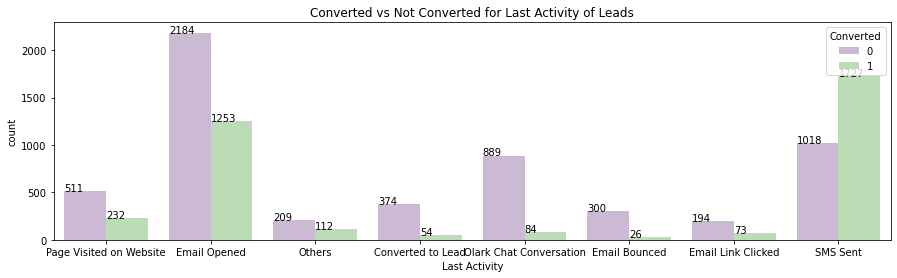

In [128]:
# See the Converted vs Not Converted for Last Activity
plt.figure(figsize=(15,4))
ax = sns.countplot(x='Last Activity', hue='Converted', data=leads, palette='PRGn')
annotate_bar_graph(ax)
plt.title('Converted vs Not Converted for Last Activity of Leads')
plt.xlabel('Last Activity')
plt.show()

- Around ~50% of leads from Email Opened and Others category are converted.
- ~63% of Leads for whom the last activity is 'SMS_Sent' are selected.

In [129]:
# Value Counts for Specialization
leads['Specialization'].value_counts(normalize=True)*100

Not Selected                         36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

We can see there are many categories with less than 2% of leads. Hence we will rename them to Others

In [130]:
remove_cats = list((leads['Specialization'].value_counts(normalize=True)*100).reset_index(name='count').query("count < 2")['index'])
remove_cats

['International Business',
 'Healthcare Management',
 'Hospitality Management',
 'E-COMMERCE',
 'Retail Management',
 'Rural and Agribusiness',
 'E-Business',
 'Services Excellence']

In [131]:
leads['Specialization'] = leads['Specialization'].replace(remove_cats,'Others')
leads['Specialization'].value_counts()

Not Selected                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Others                                833
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
Name: Specialization, dtype: int64

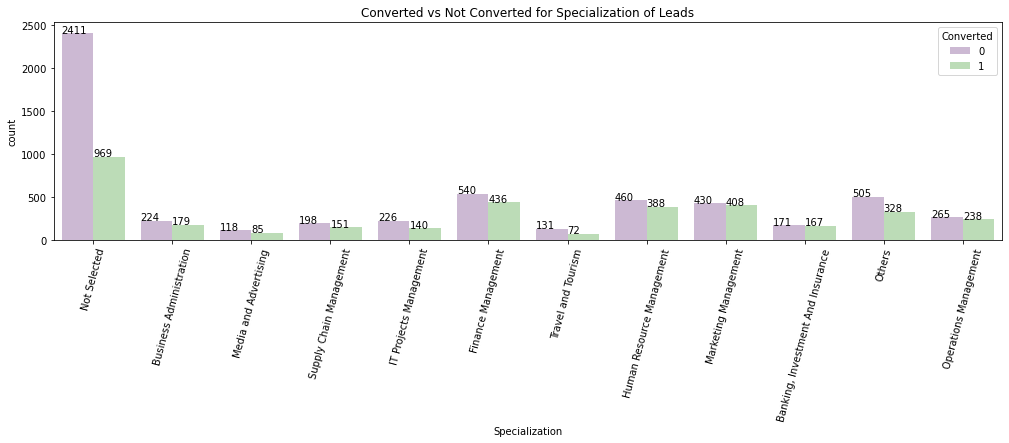

In [132]:
# See the Converted vs Not Converted for Specialization
plt.figure(figsize=(17,4))
ax = sns.countplot(x='Specialization', hue='Converted', data=leads, palette='PRGn')
annotate_bar_graph(ax)
plt.title('Converted vs Not Converted for Specialization of Leads')
plt.xlabel('Specialization')
plt.xticks(rotation=75)
plt.show()

We are seeing good convertion(30-50%) in almost all the categories except the No Selected ones.

In [133]:
# Value Counts for Current occupation
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

We can see there are 3 categories with less than 2% of leads. Hence we will rename them to Others

In [134]:
remove_cats = list((leads['What is your current occupation'].value_counts(normalize=True)*100).reset_index(name='count').query("count < 2")['index'])
remove_cats

['Other', 'Housewife', 'Businessman']

In [135]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(remove_cats,'Others')
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Others                   0.367965
Name: What is your current occupation, dtype: float64

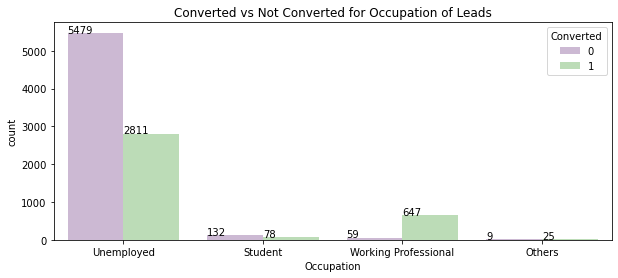

In [136]:
# See the Converted vs Not Converted for What is your current occupation
plt.figure(figsize=(10,4))
ax = sns.countplot(x='What is your current occupation', hue='Converted', data=leads, palette='PRGn')
annotate_bar_graph(ax)
plt.title('Converted vs Not Converted for Occupation of Leads')
plt.xlabel('Occupation')
plt.show()

- We can see ~73% convertion from Others, but the participation is very low from this category.
- Major participation is from Unemployed category.
- From Unemployed and Student Category, the convertion is ~34% and ~37% respectively.
- For the Working Professionals there is a visible paricipation and heavy convertion of ~91%.

In [137]:
# Value counts for city
leads['City'].value_counts(normalize=True)*100

Not Updated                    39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

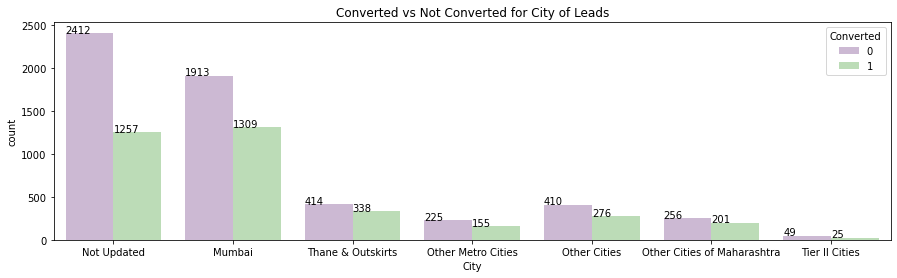

In [138]:
# See the Converted vs Not Converted for City
plt.figure(figsize=(15,4))
ax = sns.countplot(x='City', hue='Converted', data=leads, palette='PRGn')
annotate_bar_graph(ax)
plt.title('Converted vs Not Converted for City of Leads')
plt.xlabel('City')
plt.show()

In [139]:
1257/(1257+2412), 1309/(1913+1309), 338/(338+414), 155/(155+225), 276/(276+410), 201/(201+256), 25/(25+49)

(0.3426001635322976,
 0.4062693978895096,
 0.449468085106383,
 0.40789473684210525,
 0.40233236151603496,
 0.43982494529540483,
 0.33783783783783783)

- Majority of the leads did not update their City.
- Next highest number of leads are from Mumbai,Thane and Outskirts. This means the major customer base of the company is in Maharashra.
- For all categories of Cities, the convertion rate is between 30-40%.

In [140]:
# See the columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview'],
      dtype='object')

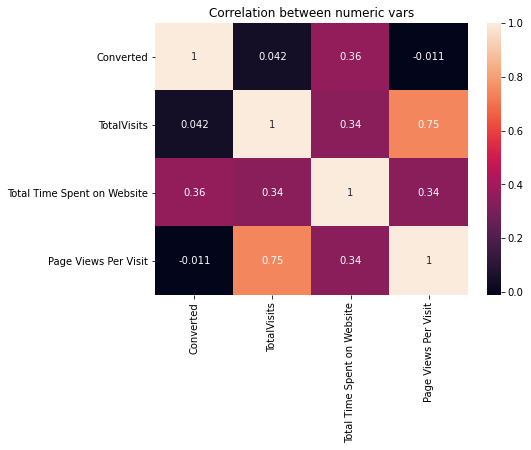

In [141]:
# See the correlation
plt.figure(figsize=(7,5))
sns.heatmap(leads[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), annot=True)
plt.title('Correlation between numeric vars')
plt.show()
plt.close()

- We can see the page views per visit and total visits have higher correlation among the numeric vars.
- Conveterted column has higher correlation with Total Time Spent on Website.

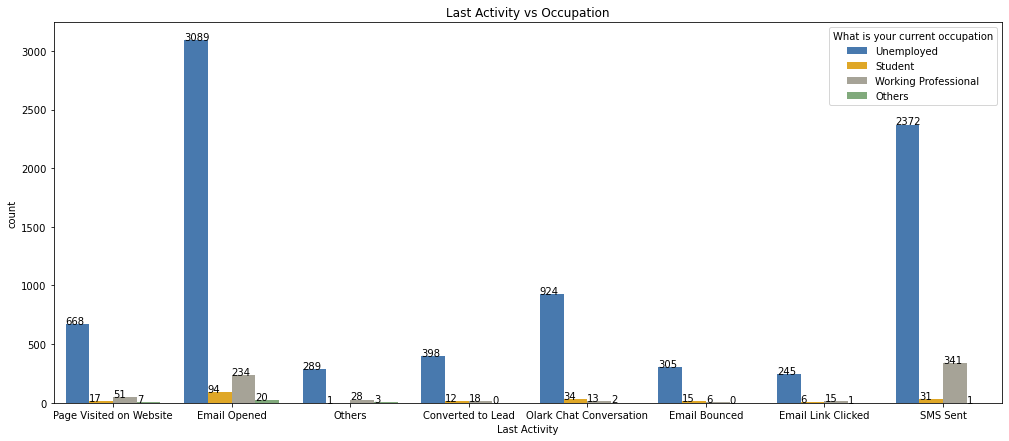

In [142]:
# Last Activity vs Occupation
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]


plt.figure(figsize=(17,7))
ax = sns.countplot(x='Last Activity', hue='What is your current occupation', data=leads, palette=sns.xkcd_palette(colors))
annotate_bar_graph(ax)
plt.title('Last Activity vs Occupation')
plt.xlabel('Last Activity')
plt.show()

- We can see the majority of leads under different categories of Last Activity are from Unemployed category.
- In all the Last Activity Categories, we can see that the contribution of Unemployed Leads is high

In [143]:
# Final Columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview'],
      dtype='object')

# 3. Prepare Data for Modelling

This step includes:
1. Imputing binary variables with 1 and 0.
2. Creating dummy variables for categorical columns.

In [144]:
# Look at the head of dataframe

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Not Updated,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,Not Selected,Unemployed,Not Updated,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Not Selected,Unemployed,Mumbai,No


In [145]:
# Impute 1s and 0s for binary vars
binary_vars = ['A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

leads[binary_vars] = leads[binary_vars].apply(binary_map)

In [146]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Not Updated,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,Not Selected,Unemployed,Not Updated,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Not Selected,Unemployed,Mumbai,0


###### Create dummy variables for categorical features:
Lead Origin, Lead Source, Last Activity, Specialization, What is your current occupation, City

In [147]:
#Lead Origin

leads['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [148]:
# Converted vs Non Converted Ratio for various values in Lead Origin
leads.groupby('Lead Origin')['Converted'].value_counts(normalize=True)*100

Lead Origin              Converted
API                      0             68.854749
                         1             31.145251
Landing Page Submission  0             63.814982
                         1             36.185018
Lead Add Form            1             92.479109
                         0              7.520891
Lead Import              0             76.363636
                         1             23.636364
Quick Add Form           1            100.000000
Name: Converted, dtype: float64

In [149]:
# Create dummy var by dropping Quick Add Form as there are very less values

lo = pd.get_dummies(leads['Lead Origin'], prefix='LeadOrigin')
lo1 = lo.drop('LeadOrigin_Quick Add Form', axis=1)
leads = pd.concat([leads,lo1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Not Updated,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,Not Selected,Unemployed,Not Updated,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Not Selected,Unemployed,Mumbai,0,0,1,0,0


In [150]:
# Lead Source

leads['Lead Source'].value_counts(normalize=True)*100

Google            31.482684
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Others             9.512987
Name: Lead Source, dtype: float64

In [151]:
# Converted vs Non Converted Ratio for various values in Lead Source

leads.groupby('Lead Source')['Converted'].value_counts(normalize=True)*100

Lead Source     Converted
Direct Traffic  0            67.833268
                1            32.166732
Google          0            59.573737
                1            40.426263
Olark Chat      0            74.472934
                1            25.527066
Organic Search  0            62.218371
                1            37.781629
Others          1            77.701934
                0            22.298066
Name: Converted, dtype: float64

In [152]:
# Create dummy vars for Lead Source by dropping Others column as there are very less values

ls = pd.get_dummies(leads['Lead Source'], prefix='LeadSource')
ls1 = ls.drop('LeadSource_Others', axis=1)
leads = pd.concat([leads,ls1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Not Updated,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,Not Selected,Unemployed,Not Updated,0,1,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,1,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,0,1,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Not Selected,Unemployed,Mumbai,0,0,1,0,0,0,1,0,0


In [153]:
# Last Activity

leads['Last Activity'].value_counts(normalize=True)*100

Email Opened               37.196970
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Page Visited on Website     8.041126
Converted to Lead           4.632035
Email Bounced               3.528139
Others                      3.474026
Email Link Clicked          2.889610
Name: Last Activity, dtype: float64

In [154]:
leads.groupby('Last Activity')['Converted'].value_counts(normalize=True)*100

Last Activity            Converted
Converted to Lead        0            87.383178
                         1            12.616822
Email Bounced            0            92.024540
                         1             7.975460
Email Link Clicked       0            72.659176
                         1            27.340824
Email Opened             0            63.543788
                         1            36.456212
Olark Chat Conversation  0            91.366906
                         1             8.633094
Others                   0            65.109034
                         1            34.890966
Page Visited on Website  0            68.775236
                         1            31.224764
SMS Sent                 1            62.914390
                         0            37.085610
Name: Converted, dtype: float64

In [155]:
# create dummy vars by removing Converted to Lead column as there are very less Convertion for this column

la = pd.get_dummies(leads['Last Activity'], prefix='LastActivity')
la1 = la.drop('LastActivity_Converted to Lead', axis=1)
leads = pd.concat([leads,la1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Not Updated,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,Not Selected,Unemployed,Not Updated,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Not Selected,Unemployed,Mumbai,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [156]:
# Specialization

leads['Specialization'].value_counts(normalize=True)*100

Not Selected                         36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Others                                9.015152
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
Name: Specialization, dtype: float64

In [157]:
# Converted vs Not Converted ratio for various specializations
leads.groupby(['Specialization'])['Converted'].value_counts(normalize=True)*100

Specialization                     Converted
Banking, Investment And Insurance  0            50.591716
                                   1            49.408284
Business Administration            0            55.583127
                                   1            44.416873
Finance Management                 0            55.327869
                                   1            44.672131
Human Resource Management          0            54.245283
                                   1            45.754717
IT Projects Management             0            61.748634
                                   1            38.251366
Marketing Management               0            51.312649
                                   1            48.687351
Media and Advertising              0            58.128079
                                   1            41.871921
Not Selected                       0            71.331361
                                   1            28.668639
Operations Management      

In [158]:
# Creating dummy vars for specialization by removing Banking, Investment and Insurance
sp = pd.get_dummies(leads['Specialization'], prefix='Specialization')
sp1 = sp.drop('Specialization_Banking, Investment And Insurance', axis=1)
leads = pd.concat([leads,sp1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Not Updated,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,Not Selected,Unemployed,Not Updated,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Not Selected,Unemployed,Mumbai,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [159]:
#What is your current occupation
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Others                   0.367965
Name: What is your current occupation, dtype: float64

In [160]:
# Converted vs Not Converted ratio for What is your current occupation
leads.groupby('What is your current occupation')['Converted'].value_counts(normalize=True)*100

What is your current occupation  Converted
Others                           1            73.529412
                                 0            26.470588
Student                          0            62.857143
                                 1            37.142857
Unemployed                       0            66.091677
                                 1            33.908323
Working Professional             1            91.643059
                                 0             8.356941
Name: Converted, dtype: float64

In [161]:
# Create dummy vars by removing Others column as there are less values.

oc = pd.get_dummies(leads['What is your current occupation'], prefix='Occupation')
oc1 = oc.drop('Occupation_Others',axis=1)
leads = pd.concat([leads,oc1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Not Updated,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,Not Selected,Unemployed,Not Updated,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Not Selected,Unemployed,Mumbai,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [162]:
# City

leads['City'].value_counts(normalize=True)*100

Not Updated                    39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [163]:
# Converted vs Not Converted ratio for City column
leads.groupby('City')['Converted'].value_counts(normalize=True)*100

City                         Converted
Mumbai                       0            59.373060
                             1            40.626940
Not Updated                  0            65.739984
                             1            34.260016
Other Cities                 0            59.766764
                             1            40.233236
Other Cities of Maharashtra  0            56.017505
                             1            43.982495
Other Metro Cities           0            59.210526
                             1            40.789474
Thane & Outskirts            0            55.053191
                             1            44.946809
Tier II Cities               0            66.216216
                             1            33.783784
Name: Converted, dtype: float64

In [164]:
# Remove Tier II Cities as there are very less values while creating dummies for City
city = pd.get_dummies(leads['City'], prefix='City')
city1 = city.drop('City_Tier II Cities', axis=1)
leads = pd.concat([leads,city1], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Mumbai,City_Not Updated,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Not Updated,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,Not Selected,Unemployed,Not Updated,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,Not Selected,Unemployed,Mumbai,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


In [165]:
# Drop all Categorical columns

leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City'], axis=1, inplace=True)

In [166]:
leads.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,LastActivity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Mumbai,City_Not Updated,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5,674,2.5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


In [167]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadOrigin_Lead Import', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LastActivity_Email Bounced',
       'LastActivity_Email Link Clicked', 'LastActivity_Email Opened',
       'LastActivity_Olark Chat Conversation', 'LastActivity_Others',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Not Selected',
       'Specialization_

In [168]:
len(leads.columns)

42

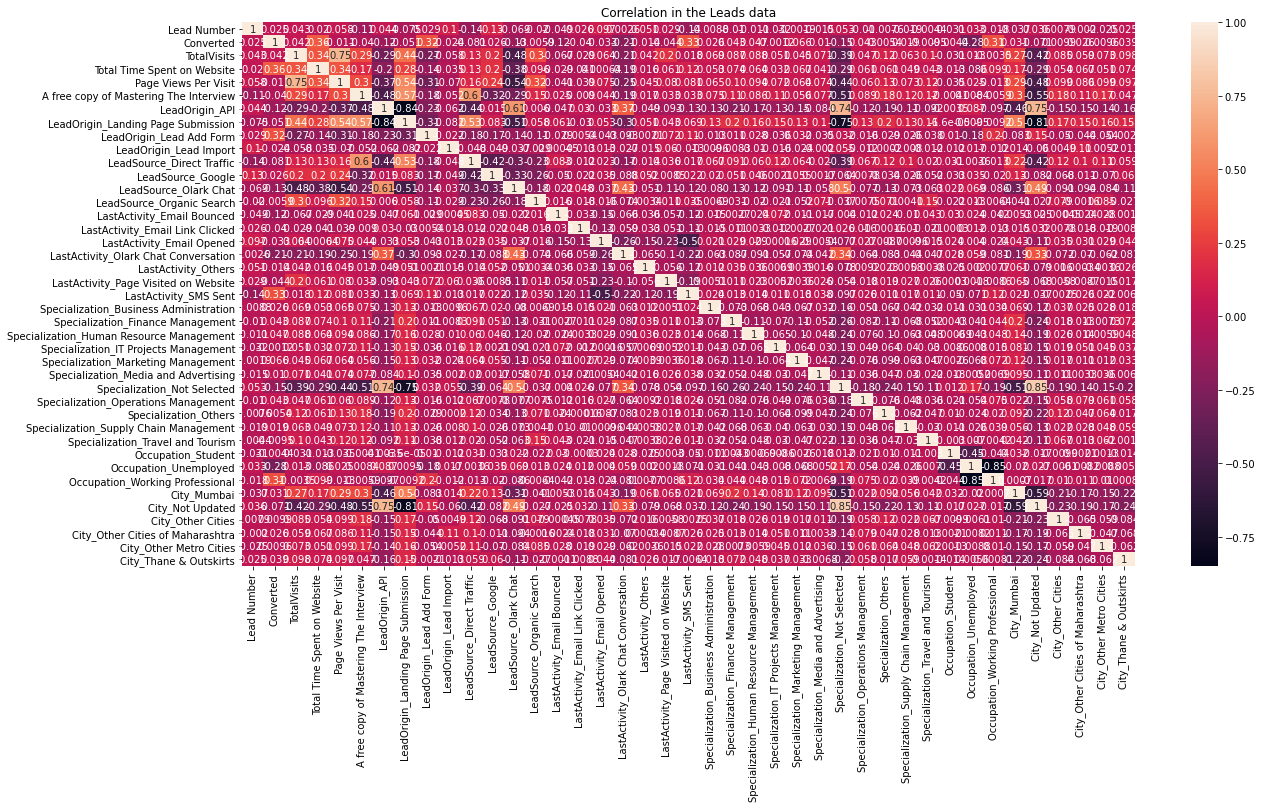

In [169]:
# See correlation between vars
plt.figure(figsize=(20,10))
sns.heatmap(leads.corr(),annot=True)
plt.title('Correlation in the Leads data')
plt.show()

We are seeing high correlation between the dummy variables with their complimentary dummy variables

LeadOrigin_API vs LeadOrigin_Landing Page Submission, LeadOrigin_Direct Traffic vs LeadOrigin_Landing Page Submission, LastActivity_Email Opened vs LastActivity_SMS Sent, City_Mumbai vs City_Not Updated, Occpation_unemployed vs Occupation_working professional

Hence let us drop the below variables from the dataset
LeadOrigin_Landing Page Submission, LastActivity_SMS Sent, City_Not Updated, Occupation_Working Professional

In [170]:
leads.drop(['LeadOrigin_Landing Page Submission', 'LastActivity_SMS Sent', 'City_Not Updated', 'Occupation_Working Professional'], axis=1, inplace=True)

In [171]:
leads.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5,674,2.5,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2,1532,2.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1,305,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


As both prospect id and lead number are unique values to identify the lead, we will keep the lead number and remove the prospect id.

In [172]:
# Remove prospect id and convert lead number to index

leads.drop('Prospect ID', axis=1, inplace=True)
leads.set_index('Lead Number', inplace=True)
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
660728,0,5,674,2.5,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
660727,1,2,1532,2.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
660719,0,1,305,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
660681,1,2,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


## Test Train Split

Split the data into train and test sets X_train, X_test, y_train, y_test

In [173]:
X = leads.drop('Converted',axis=1)

In [174]:
y = leads['Converted']

In [175]:
X.shape

(9240, 35)

In [176]:
y.shape

(9240,)

In [177]:
# Split the test and train data at train_size=0.7
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [178]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
641410,0,0,0.00,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
597687,4,487,1.33,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
626825,5,106,2.50,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
587928,5,1230,5.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
622366,0,0,0.00,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [179]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 641410 to 606685
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               6468 non-null   int32  
 1   Total Time Spent on Website               6468 non-null   int64  
 2   Page Views Per Visit                      6468 non-null   float64
 3   A free copy of Mastering The Interview    6468 non-null   int64  
 4   LeadOrigin_API                            6468 non-null   uint8  
 5   LeadOrigin_Lead Add Form                  6468 non-null   uint8  
 6   LeadOrigin_Lead Import                    6468 non-null   uint8  
 7   LeadSource_Direct Traffic                 6468 non-null   uint8  
 8   LeadSource_Google                         6468 non-null   uint8  
 9   LeadSource_Olark Chat                     6468 non-null   uint8  
 10  LeadSource_Organic Search    

In [180]:
y_train.head()

Lead Number
641410    0
597687    0
626825    0
587928    0
622366    0
Name: Converted, dtype: int64

In [181]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
619003,8,1011,7.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
636884,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
590281,5,59,5.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
579892,0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
617929,0,0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [182]:
y_test.head()

Lead Number
619003    1
636884    1
590281    1
579892    0
617929    1
Name: Converted, dtype: int64

## Scale the train data

We will use the standard scaler to scale the train data so that the standard deviation is 1 and mean is 0.

In [183]:
# Declare scaler object
scaler = StandardScaler()

In [184]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
641410,0,0,0.00,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
597687,4,487,1.33,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
626825,5,106,2.50,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
587928,5,1230,5.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
622366,0,0,0.00,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [185]:
cols_to_scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
641410,-1.093351,-0.885371,-1.201865,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
597687,0.261918,0.005716,-0.500457,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
626825,0.600736,-0.691418,0.116572,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
587928,0.600736,1.365219,1.435010,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
622366,-1.093351,-0.885371,-1.201865,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


# 4. Build the Model

In [186]:
# Build a model with 25 features using RFE

logreg = LogisticRegression()

In [187]:
rfe = RFE(logreg, 25)
rfe = rfe.fit(X_train,y_train)

In [188]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', True, 1),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Google', False, 8),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 7),
 ('LastActivity_Email Bounced', True, 1),
 ('LastActivity_Email Link Clicked', True, 1),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Olark Chat Conversation', True, 1),
 ('LastActivity_Others', True, 1),
 ('LastActivity_Page Visited on Website', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', False, 11),
 ('Specialization_Human Resource Management', False, 3),
 ('Specialization_IT Projects Management', False, 9),
 ('Specialization_Marketing Management', False, 4),
 ('Specialization_Media and Advertising',

#### Build the model using statsmodels

In [189]:
cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'LeadOrigin_API',
       'LeadOrigin_Lead Add Form', 'LeadOrigin_Lead Import',
       'LeadSource_Direct Traffic', 'LeadSource_Olark Chat',
       'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Opened', 'LastActivity_Olark Chat Conversation',
       'LastActivity_Others', 'LastActivity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_Not Selected',
       'Specialization_Others', 'Occupation_Student', 'Occupation_Unemployed',
       'City_Mumbai', 'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts'],
      dtype='object')

In [190]:
X_train_sm = sm.add_constant(X_train[cols])
logreg1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logreg1_model = logreg1.fit()
logreg1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2760.8
Date:                Mon, 07 Sep 2020   Deviance:                       5521.6
Time:                        06:55:51   Pearson chi2:                 7.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.8484      0.235      7.855      0.000       1.387       2.310
TotalVisits                                0.4084      0.052      7.911      0.000       0.307       0.510
Total Time Spent on Website                1.0740      0.039     27.600      0.000       0.998       1.150
Page Views Per Visit                      -0.2441      0.056     -4.372      0.000      -0.354      -0.135
A free copy of Mastering The Interview    -0.3174      0.099     -3.199      0.001      -0.512      -0.123
LeadOrigin_API                             0.9762      0.142      6.870      0.000       0.698       1.255
LeadOrigin_Lead Add Form                   4.7291      0.223     21.206      0.000       4.292       5.166
LeadOrigin_Lead Import                     0.5749      0.535      1.074      0.283      -0.474       1.624
LeadSource_Direct Traffic                 -0.1502      0.101     -1.493      0.135      -0.347       0.047
LeadSource_Olark Chat                      1.3103      0.136      9.605      0.000       1.043       1.578
LastActivity_Email Bounced                -2.8275      0.303     -9.317      0.000      -3.422      -2.233
LastActivity_Email Link Clicked           -1.4375      0.221     -6.508      0.000      -1.870      -1.005
LastActivity_Email Opened                 -0.9149      0.076    -12.022      0.000      -1.064      -0.766
LastActivity_Olark Chat Conversation      -2.4800      0.175    -14.154      0.000      -2.823      -2.137
LastActivity_Others                       -1.1525      0.197     -5.853      0.000      -1.538      -0.767
LastActivity_Page Visited on Website      -1.9023      0.153    -12.441      0.000      -2.202      -1.603
Specialization_Business Administration    -0.1842      0.167     -1.102      0.270      -0.512       0.143
Specialization_Not Selected               -0.8383      0.154     -5.460      0.000      -1.139      -0.537
Specialization_Others                     -0.2423      0.123     -1.963      0.050      -0.484      -0.000
Occupation_Student                        -2.1823      0.292     -7.486      0.000      -2.754      -1.611
Occupation_Unemployed                     -2.5535      0.176    -14.522      0.000      -2.898      -2.209
City_Mumbai                                0.4537      0.162      2.805      0.005       0.137       0.771
City_Other Cities                          0.5408      0.192      2.813      0.005       0.164       0.918
City_Other Cities of Maharashtra           0.5656      0.212      2.671      0.008       0.151       0.981
City_Other Metro Cities                    0.7151      0.221      3.234      0.001       0.282       1.148
City_Thane & Outskirts                     0.4157      0.188      2.214      0.027     

- p value is > 0.05 for the features LeadOrigin_Lead Import=0.283, LeadSource_Direct Traffic=0.135, Specialization_Business Administration = 0.27

In [191]:
# Method for calculating Variance Inflation Factor.

def get_vif(X):
    vif = pd.DataFrame()
    vif['FEATURES'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF',ascending=False, inplace=True)
    return vif

In [192]:
get_vif(X_train_sm[cols]).sort_values(by='VIF', ascending=False)

,FEATURES,VIF
19,Occupation_Unemployed,10.59
16,Specialization_Not Selected,6.52
4,LeadOrigin_API,5.47
20,City_Mumbai,4.69
8,LeadSource_Olark Chat,3.01
2,Page Views Per Visit,2.89
3,A free copy of Mastering The Interview,2.86
0,TotalVisits,2.51
7,LeadSource_Direct Traffic,2.44
11,LastActivity_Email Opened,2.14


In [193]:
# Prediction

y_train_pred = logreg1_model.predict(sm.add_constant(X_train[cols]))
y_train_pred

Lead Number
641410    0.392333
597687    0.104350
626825    0.332380
587928    0.704253
622366    0.218257
            ...   
656685    0.918398
659710    0.994923
588165    0.218257
596447    0.295572
606685    0.218257
Length: 6468, dtype: float64

In [194]:
y_train_pred_final = pd.DataFrame({
    'Converted':y_train, 'Converted_Prob':y_train_pred
})
y_train_pred_final.head()

,Converted,Converted_Prob
Lead Number,,
641410,0,0.392333
597687,0,0.104350
626825,0,0.332380
587928,0,0.704253
622366,0,0.218257


In [195]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)

In [196]:
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.392333,0
597687,0,0.104350,0
626825,0,0.332380,0
587928,0,0.704253,1
622366,0,0.218257,0


In [197]:
y_train_pred_final['Converted'].sum(),y_train_pred_final['predicted'].sum()

(2466, 2104)

In [198]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3562,  440],
       [ 802, 1664]], dtype=int64)

In [199]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3562,  440],
       [ 802, 1664]], dtype=int64)

In [200]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.8079777365491652

In [201]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.67

The accuracy for this model is 80% but the sensitivity is less than 80% when the cut off is 0.5.

We will prioritize to drop the column/feature with highest p-value i.e. LeadOrigin_Lead Import

In [202]:
cols = list(cols)
cols.remove('LeadOrigin_Lead Import')
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Direct Traffic',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Business Administration',
 'Specialization_Not Selected',
 'Specialization_Others',
 'Occupation_Student',
 'Occupation_Unemployed',
 'City_Mumbai',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities',
 'City_Thane & Outskirts']

In [203]:
# Build the 2nd logreg model
X_train_sm = sm.add_constant(X_train[cols])
logreg2 = sm.GLM(y_train, X_train_sm, family =  sm.families.Binomial())
logreg2_model = logreg2.fit()
logreg2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2761.3
Date:                Mon, 07 Sep 2020   Deviance:                       5522.7
Time:                        06:55:51   Pearson chi2:                 7.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.8442      0.235      7.841      0.000       1.383       2.305
TotalVisits                                0.4058      0.052      7.874      0.000       0.305       0.507
Total Time Spent on Website                1.0727      0.039     27.588      0.000       0.996       1.149
Page Views Per Visit                      -0.2486      0.056     -4.465      0.000      -0.358      -0.139
A free copy of Mastering The Interview    -0.3202      0.099     -3.231      0.001      -0.514      -0.126
LeadOrigin_API                             0.9615      0.141      6.801      0.000       0.684       1.239
LeadOrigin_Lead Add Form                   4.7040      0.222     21.226      0.000       4.270       5.138
LeadSource_Direct Traffic                 -0.1580      0.100     -1.576      0.115      -0.355       0.039
LeadSource_Olark Chat                      1.2992      0.136      9.561      0.000       1.033       1.565
LastActivity_Email Bounced                -2.8289      0.303     -9.326      0.000      -3.423      -2.234
LastActivity_Email Link Clicked           -1.4373      0.221     -6.509      0.000      -1.870      -1.005
LastActivity_Email Opened                 -0.9134      0.076    -12.006      0.000      -1.062      -0.764
LastActivity_Olark Chat Conversation      -2.4788      0.175    -14.157      0.000      -2.822      -2.136
LastActivity_Others                       -1.1534      0.197     -5.861      0.000      -1.539      -0.768
LastActivity_Page Visited on Website      -1.8898      0.152    -12.401      0.000      -2.189      -1.591
Specialization_Business Administration    -0.1819      0.167     -1.089      0.276      -0.509       0.145
Specialization_Not Selected               -0.8130      0.152     -5.353      0.000      -1.111      -0.515
Specialization_Others                     -0.2400      0.123     -1.944      0.052      -0.482       0.002
Occupation_Student                        -2.1891      0.291     -7.515      0.000      -2.760      -1.618
Occupation_Unemployed                     -2.5567      0.176    -14.543      0.000      -2.901      -2.212
City_Mumbai                                0.4716      0.161      2.929      0.003       0.156       0.787
City_Other Cities                          0.5589      0.192      2.917      0.004       0.183       0.934
City_Other Cities of Maharashtra           0.5908      0.211      2.804      0.005       0.178       1.004
City_Other Metro Cities                    0.7366      0.220      3.347      0.001       0.305       1.168
City_Thane & Outskirts                     0.4303      0.187      2.298      0.022       0.063       0.797
=======================================================================================

p-value > 0.05 for LeadSource_Direct Traffic(0.115), Specialization_Business Administration(0.276), Specialization_Others(0.052)

In [204]:
# See VIF
get_vif(X_train_sm[cols]).sort_values(by='VIF', ascending=False)

,FEATURES,VIF
18,Occupation_Unemployed,10.55
15,Specialization_Not Selected,6.25
4,LeadOrigin_API,5.36
19,City_Mumbai,4.57
7,LeadSource_Olark Chat,2.98
2,Page Views Per Visit,2.85
3,A free copy of Mastering The Interview,2.85
0,TotalVisits,2.51
6,LeadSource_Direct Traffic,2.41
10,LastActivity_Email Opened,2.14


In [205]:
y_train_pred_final['Converted_Prob'] = logreg2_model.predict(sm.add_constant(X_train[cols]))
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.387018,0
597687,0,0.107028,0
626825,0,0.330670,0
587928,0,0.704854,1
622366,0,0.218762,0


In [206]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.8078231292517006

In [207]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3561,  441],
       [ 802, 1664]], dtype=int64)

In [208]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.67

Accuracy and sensitivity are the same.

We will prioritize to drop the column/feature with highest p-value i.e. Specialization_Business Administration

In [209]:
# Drop Specialization_Business Administration and build the model again
cols.remove('Specialization_Business Administration')
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Direct Traffic',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Not Selected',
 'Specialization_Others',
 'Occupation_Student',
 'Occupation_Unemployed',
 'City_Mumbai',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities',
 'City_Thane & Outskirts']

In [210]:
# Build logreg model 3
X_train_sm = sm.add_constant(X_train[cols])
logreg3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logreg3_model = logreg3.fit()
logreg3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2761.9
Date:                Mon, 07 Sep 2020   Deviance:                       5523.9
Time:                        06:55:52   Pearson chi2:                 7.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.8242      0.234      7.783      0.000       1.365       2.284
TotalVisits                                0.4054      0.052      7.870      0.000       0.304       0.506
Total Time Spent on Website                1.0725      0.039     27.588      0.000       0.996       1.149
Page Views Per Visit                      -0.2470      0.056     -4.440      0.000      -0.356      -0.138
A free copy of Mastering The Interview    -0.3197      0.099     -3.226      0.001      -0.514      -0.125
LeadOrigin_API                             0.9637      0.141      6.820      0.000       0.687       1.241
LeadOrigin_Lead Add Form                   4.7066      0.222     21.242      0.000       4.272       5.141
LeadSource_Direct Traffic                 -0.1571      0.100     -1.568      0.117      -0.354       0.039
LeadSource_Olark Chat                      1.2989      0.136      9.557      0.000       1.032       1.565
LastActivity_Email Bounced                -2.8261      0.304     -9.307      0.000      -3.421      -2.231
LastActivity_Email Link Clicked           -1.4367      0.221     -6.498      0.000      -1.870      -1.003
LastActivity_Email Opened                 -0.9132      0.076    -12.006      0.000      -1.062      -0.764
LastActivity_Olark Chat Conversation      -2.4772      0.175    -14.151      0.000      -2.820      -2.134
LastActivity_Others                       -1.1508      0.197     -5.850      0.000      -1.536      -0.765
LastActivity_Page Visited on Website      -1.8919      0.152    -12.409      0.000      -2.191      -1.593
Specialization_Not Selected               -0.7961      0.151     -5.270      0.000      -1.092      -0.500
Specialization_Others                     -0.2254      0.123     -1.837      0.066      -0.466       0.015
Occupation_Student                        -2.1839      0.291     -7.499      0.000      -2.755      -1.613
Occupation_Unemployed                     -2.5555      0.176    -14.536      0.000      -2.900      -2.211
City_Mumbai                                0.4743      0.161      2.949      0.003       0.159       0.790
City_Other Cities                          0.5595      0.191      2.922      0.003       0.184       0.935
City_Other Cities of Maharashtra           0.5913      0.211      2.807      0.005       0.178       1.004
City_Other Metro Cities                    0.7417      0.220      3.370      0.001       0.310       1.173
City_Thane & Outskirts                     0.4362      0.187      2.332      0.020       0.070       0.803
==========================================================================================================
"""

- p-value is greater than 0.05 for LeadSource_Direct Traffic(0.117) and Specialization_Others(0.066)

In [211]:
# See VIF
get_vif(X_train_sm[cols]).sort_values(by='VIF',ascending=False)

,FEATURES,VIF
17,Occupation_Unemployed,10.53
14,Specialization_Not Selected,6.21
4,LeadOrigin_API,5.36
18,City_Mumbai,4.56
7,LeadSource_Olark Chat,2.98
2,Page Views Per Visit,2.85
3,A free copy of Mastering The Interview,2.85
0,TotalVisits,2.51
6,LeadSource_Direct Traffic,2.41
10,LastActivity_Email Opened,2.14


In [212]:
y_train_pred_final['Converted_Prob'] = logreg3_model.predict(sm.add_constant(X_train[cols]))
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.382746,0
597687,0,0.106979,0
626825,0,0.330750,0
587928,0,0.704958,1
622366,0,0.218569,0


In [213]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.806895485466914

In [214]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3563,  439],
       [ 810, 1656]], dtype=int64)

In [215]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.67

Accuracy = ~80.7% and sensitivity remains the same.

We will prioritize to drop the column/feature with highest p-value i.e. LeadSource_Direct Traffic

In [216]:
cols.remove('LeadSource_Direct Traffic')
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Not Selected',
 'Specialization_Others',
 'Occupation_Student',
 'Occupation_Unemployed',
 'City_Mumbai',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities',
 'City_Thane & Outskirts']

In [217]:
# Build the logreg4 model again
X_train_sm = sm.add_constant(X_train[cols])
logreg4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logreg4_model = logreg4.fit()
logreg4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2763.2
Date:                Mon, 07 Sep 2020   Deviance:                       5526.3
Time:                        06:55:53   Pearson chi2:                 7.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.7659      0.231      7.642      0.000       1.313       2.219
TotalVisits                                0.4133      0.051      8.064      0.000       0.313       0.514
Total Time Spent on Website                1.0725      0.039     27.586      0.000       0.996       1.149
Page Views Per Visit                      -0.2357      0.055     -4.276      0.000      -0.344      -0.128
A free copy of Mastering The Interview    -0.3926      0.088     -4.483      0.000      -0.564      -0.221
LeadOrigin_API                             1.0122      0.138      7.343      0.000       0.742       1.282
LeadOrigin_Lead Add Form                   4.7827      0.216     22.096      0.000       4.358       5.207
LeadSource_Olark Chat                      1.3303      0.135      9.885      0.000       1.067       1.594
LastActivity_Email Bounced                -2.8354      0.304     -9.338      0.000      -3.431      -2.240
LastActivity_Email Link Clicked           -1.4350      0.221     -6.498      0.000      -1.868      -1.002
LastActivity_Email Opened                 -0.9165      0.076    -12.057      0.000      -1.066      -0.768
LastActivity_Olark Chat Conversation      -2.4769      0.175    -14.151      0.000      -2.820      -2.134
LastActivity_Others                       -1.1447      0.197     -5.815      0.000      -1.530      -0.759
LastActivity_Page Visited on Website      -1.9015      0.152    -12.474      0.000      -2.200      -1.603
Specialization_Not Selected               -0.8012      0.151     -5.303      0.000      -1.097      -0.505
Specialization_Others                     -0.2221      0.123     -1.811      0.070      -0.463       0.018
Occupation_Student                        -2.1889      0.291     -7.518      0.000      -2.759      -1.618
Occupation_Unemployed                     -2.5496      0.175    -14.532      0.000      -2.893      -2.206
City_Mumbai                                0.4873      0.161      3.034      0.002       0.173       0.802
City_Other Cities                          0.5716      0.191      2.988      0.003       0.197       0.947
City_Other Cities of Maharashtra           0.5960      0.211      2.829      0.005       0.183       1.009
City_Other Metro Cities                    0.7574      0.220      3.446      0.001       0.327       1.188
City_Thane & Outskirts                     0.4466      0.187      2.389      0.017       0.080       0.813
==========================================================================================================
"""

- Specialization_Others have p-value > 0.05

In [218]:
# Calculate vif
get_vif(X_train_sm[cols]).sort_values(by='VIF', ascending=False)

,FEATURES,VIF
16,Occupation_Unemployed,10.39
13,Specialization_Not Selected,6.18
4,LeadOrigin_API,5.24
17,City_Mumbai,4.53
6,LeadSource_Olark Chat,2.91
2,Page Views Per Visit,2.82
0,TotalVisits,2.48
3,A free copy of Mastering The Interview,2.20
9,LastActivity_Email Opened,2.13
18,City_Other Cities,1.82


In [219]:
y_train_pred_final['Converted_Prob'] = logreg4_model.predict(sm.add_constant(X_train[cols]))
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.383236,0
597687,0,0.110062,0
626825,0,0.336328,0
587928,0,0.701774,1
622366,0,0.218047,0


In [220]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.8075139146567718

In [221]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3560,  442],
       [ 803, 1663]], dtype=int64)

In [222]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.67

Accuracy = ~80.7% and sensitivity remains the same.

We will drop Specialization_Others as it has p-value >0.05

In [223]:
cols.remove('Specialization_Others')
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Not Selected',
 'Occupation_Student',
 'Occupation_Unemployed',
 'City_Mumbai',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities',
 'City_Thane & Outskirts']

In [224]:
len(cols)

21

In [225]:
# Build logreg model with 21 features
X_train_sm = sm.add_constant(X_train[cols])
logreg5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logreg5_model = logreg5.fit()
logreg5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.8
Date:                Mon, 07 Sep 2020   Deviance:                       5529.6
Time:                        06:55:53   Pearson chi2:                 7.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.7401      0.230      7.557      0.000       1.289       2.191
TotalVisits                                0.4127      0.051      8.055      0.000       0.312       0.513
Total Time Spent on Website                1.0730      0.039     27.602      0.000       0.997       1.149
Page Views Per Visit                      -0.2373      0.055     -4.309      0.000      -0.345      -0.129
A free copy of Mastering The Interview    -0.4031      0.087     -4.616      0.000      -0.574      -0.232
LeadOrigin_API                             1.0122      0.138      7.343      0.000       0.742       1.282
LeadOrigin_Lead Add Form                   4.7751      0.216     22.061      0.000       4.351       5.199
LeadSource_Olark Chat                      1.3283      0.135      9.874      0.000       1.065       1.592
LastActivity_Email Bounced                -2.8514      0.305     -9.363      0.000      -3.448      -2.255
LastActivity_Email Link Clicked           -1.4306      0.221     -6.480      0.000      -1.863      -0.998
LastActivity_Email Opened                 -0.9131      0.076    -12.021      0.000      -1.062      -0.764
LastActivity_Olark Chat Conversation      -2.4742      0.175    -14.141      0.000      -2.817      -2.131
LastActivity_Others                       -1.1473      0.196     -5.840      0.000      -1.532      -0.762
LastActivity_Page Visited on Website      -1.8995      0.152    -12.467      0.000      -2.198      -1.601
Specialization_Not Selected               -0.7760      0.150     -5.158      0.000      -1.071      -0.481
Occupation_Student                        -2.2017      0.291     -7.560      0.000      -2.773      -1.631
Occupation_Unemployed                     -2.5501      0.175    -14.551      0.000      -2.894      -2.207
City_Mumbai                                0.4907      0.160      3.058      0.002       0.176       0.805
City_Other Cities                          0.5602      0.191      2.933      0.003       0.186       0.934
City_Other Cities of Maharashtra           0.5882      0.210      2.795      0.005       0.176       1.001
City_Other Metro Cities                    0.7528      0.220      3.427      0.001       0.322       1.183
City_Thane & Outskirts                     0.4550      0.187      2.434      0.015       0.089       0.821
==========================================================================================================
"""

- All p values are less than 0.05.

Let us see VIF for the above columns

In [226]:
get_vif(X_train_sm[cols]).sort_values(by='VIF', ascending=False)

,FEATURES,VIF
15,Occupation_Unemployed,10.34
13,Specialization_Not Selected,6.13
4,LeadOrigin_API,5.24
16,City_Mumbai,4.53
6,LeadSource_Olark Chat,2.91
2,Page Views Per Visit,2.82
0,TotalVisits,2.48
3,A free copy of Mastering The Interview,2.18
9,LastActivity_Email Opened,2.13
17,City_Other Cities,1.81


In [227]:
y_train_pred_final['Converted_Prob'] = logreg5_model.predict(sm.add_constant(X_train[cols]))
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.377900,0
597687,0,0.108229,0
626825,0,0.336234,0
587928,0,0.741348,1
622366,0,0.218496,0


In [228]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.8061224489795918

In [229]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3560,  442],
       [ 812, 1654]], dtype=int64)

In [230]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.67

Accuracy = ~80.7% and sensitivity remains the same.

Dropping Occupation_Unemployed as it has highest vif score.

In [231]:
cols.remove('Occupation_Unemployed')
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Not Selected',
 'Occupation_Student',
 'City_Mumbai',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities',
 'City_Thane & Outskirts']

In [232]:
len(cols)

20

In [233]:
# Build a lohreg model with 20 features
X_train_sm = sm.add_constant(X_train[cols])
logreg6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logreg6_model = logreg6.fit()
logreg6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.6
Date:                Mon, 07 Sep 2020   Deviance:                       5831.2
Time:                        06:55:54   Pearson chi2:                 6.73e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.3930      0.155     -2.529      0.011      -0.698      -0.088
TotalVisits                                0.3910      0.050      7.883      0.000       0.294       0.488
Total Time Spent on Website                1.0946      0.038     28.746      0.000       1.020       1.169
Page Views Per Visit                      -0.2331      0.053     -4.386      0.000      -0.337      -0.129
A free copy of Mastering The Interview    -0.4141      0.084     -4.930      0.000      -0.579      -0.249
LeadOrigin_API                             1.1091      0.135      8.242      0.000       0.845       1.373
LeadOrigin_Lead Add Form                   4.9310      0.213     23.126      0.000       4.513       5.349
LeadSource_Olark Chat                      1.3227      0.132     10.037      0.000       1.064       1.581
LastActivity_Email Bounced                -2.8512      0.295     -9.659      0.000      -3.430      -2.273
LastActivity_Email Link Clicked           -1.4027      0.212     -6.610      0.000      -1.819      -0.987
LastActivity_Email Opened                 -0.9036      0.074    -12.253      0.000      -1.048      -0.759
LastActivity_Olark Chat Conversation      -2.4428      0.169    -14.428      0.000      -2.775      -2.111
LastActivity_Others                       -1.0608      0.186     -5.691      0.000      -1.426      -0.695
LastActivity_Page Visited on Website      -1.8672      0.147    -12.690      0.000      -2.156      -1.579
Specialization_Not Selected               -1.2606      0.141     -8.966      0.000      -1.536      -0.985
Occupation_Student                         0.2102      0.241      0.872      0.383      -0.262       0.683
City_Mumbai                                0.2600      0.152      1.713      0.087      -0.038       0.558
City_Other Cities                          0.3233      0.182      1.776      0.076      -0.034       0.680
City_Other Cities of Maharashtra           0.3824      0.201      1.902      0.057      -0.012       0.776
City_Other Metro Cities                    0.5811      0.210      2.765      0.006       0.169       0.993
City_Thane & Outskirts                     0.2618      0.178      1.475      0.140      -0.086       0.610
==========================================================================================================
"""

- We are seeing p-values higher than 0.05 for columns Occupation_Student(0.383), City_Mumbai(0.087), City_Other Cities(0.076), City_Other Cities of Maharashtra(0.057), City_Thane & Outskirts(0.140)

In [234]:
# See vif scores
get_vif(X_train_sm[cols]).sort_values(by='VIF', ascending=False)

,FEATURES,VIF
4,LeadOrigin_API,4.96
13,Specialization_Not Selected,4.32
6,LeadSource_Olark Chat,2.91
2,Page Views Per Visit,2.79
0,TotalVisits,2.48
15,City_Mumbai,2.32
3,A free copy of Mastering The Interview,2.13
9,LastActivity_Email Opened,2.10
10,LastActivity_Olark Chat Conversation,1.63
5,LeadOrigin_Lead Add Form,1.47


In [235]:
# Predict with the current model at a cut off of 0.5
y_train_pred_final['Converted_Prob'] = logreg6_model.predict(sm.add_constant(X_train[cols]))
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.504686,1
597687,0,0.081463,0
626825,0,0.337498,0
587928,0,0.779336,1
622366,0,0.224120,0


In [236]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7965367965367965

In [237]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3533,  469],
       [ 847, 1619]], dtype=int64)

In [238]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.66

Accuracy = ~80% and sensitivity=66%

- VIF for all columns is below 5.
- We will drop Occupation_Student which has high p-value

In [239]:
cols.remove('Occupation_Student')
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Not Selected',
 'City_Mumbai',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities',
 'City_Thane & Outskirts']

In [240]:
len(cols)

19

In [241]:
# Build the logreg model with 19 features
X_train_sm = sm.add_constant(X_train[cols])
logreg7 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logreg7_model=logreg7.fit()
logreg7_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.0
Date:                Mon, 07 Sep 2020   Deviance:                       5831.9
Time:                        06:55:55   Pearson chi2:                 6.73e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.3930      0.155     -2.529      0.011      -0.698      -0.088
TotalVisits                                0.3909      0.050      7.882      0.000       0.294       0.488
Total Time Spent on Website                1.0946      0.038     28.747      0.000       1.020       1.169
Page Views Per Visit                      -0.2334      0.053     -4.392      0.000      -0.338      -0.129
A free copy of Mastering The Interview    -0.4144      0.084     -4.934      0.000      -0.579      -0.250
LeadOrigin_API                             1.1079      0.135      8.236      0.000       0.844       1.372
LeadOrigin_Lead Add Form                   4.9303      0.213     23.138      0.000       4.513       5.348
LeadSource_Olark Chat                      1.3254      0.132     10.060      0.000       1.067       1.584
LastActivity_Email Bounced                -2.8499      0.295     -9.649      0.000      -3.429      -2.271
LastActivity_Email Link Clicked           -1.4035      0.212     -6.613      0.000      -1.819      -0.988
LastActivity_Email Opened                 -0.9010      0.074    -12.230      0.000      -1.045      -0.757
LastActivity_Olark Chat Conversation      -2.4405      0.169    -14.419      0.000      -2.772      -2.109
LastActivity_Others                       -1.0629      0.186     -5.703      0.000      -1.428      -0.698
LastActivity_Page Visited on Website      -1.8643      0.147    -12.682      0.000      -2.152      -1.576
Specialization_Not Selected               -1.2579      0.141     -8.941      0.000      -1.534      -0.982
City_Mumbai                                0.2632      0.152      1.734      0.083      -0.034       0.561
City_Other Cities                          0.3266      0.182      1.794      0.073      -0.030       0.683
City_Other Cities of Maharashtra           0.3845      0.201      1.911      0.056      -0.010       0.779
City_Other Metro Cities                    0.5850      0.210      2.785      0.005       0.173       0.997
City_Thane & Outskirts                     0.2640      0.178      1.487      0.137      -0.084       0.612
==========================================================================================================
"""

- p values are greater than 0.05 for City_mumbai(0.83), City_Other Cities(0.73), City_Other Cities of Maharashtra(0.056), City_Thane & Outskirts(0.137)

In [242]:
# See vif scores
get_vif(X_train_sm[cols]).sort_values(by='VIF', ascending=False)

,FEATURES,VIF
4,LeadOrigin_API,4.96
13,Specialization_Not Selected,4.31
6,LeadSource_Olark Chat,2.91
2,Page Views Per Visit,2.79
0,TotalVisits,2.48
14,City_Mumbai,2.30
3,A free copy of Mastering The Interview,2.13
9,LastActivity_Email Opened,2.10
10,LastActivity_Olark Chat Conversation,1.63
5,LeadOrigin_Lead Add Form,1.47


In [243]:
# Predict with the current model at a cut off of 0.5
y_train_pred_final['Converted_Prob'] = logreg7_model.predict(sm.add_constant(X_train[cols]))
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.505811,1
597687,0,0.082089,0
626825,0,0.338977,0
587928,0,0.779781,1
622366,0,0.225371,0


In [244]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7965367965367965

In [245]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3533,  469],
       [ 847, 1619]], dtype=int64)

In [246]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.66

Accuracy = ~80% and sensitivity=66%

We will remove feature City_Thane & Outskirts with p-value (0.137)

In [247]:
cols.remove('City_Thane & Outskirts')
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Not Selected',
 'City_Mumbai',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities']

In [248]:
len(cols)

18

In [249]:
# Build model with 18 features
X_train_sm = sm.add_constant(X_train[cols])
logreg8 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logreg8_model = logreg8.fit()
logreg8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2917.1
Date:                Mon, 07 Sep 2020   Deviance:                       5834.1
Time:                        06:55:55   Pearson chi2:                 6.72e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2299      0.110     -2.091      0.037      -0.445      -0.014
TotalVisits                                0.3942      0.050      7.957      0.000       0.297       0.491
Total Time Spent on Website                1.0961      0.038     28.803      0.000       1.022       1.171
Page Views Per Visit                      -0.2346      0.053     -4.416      0.000      -0.339      -0.130
A free copy of Mastering The Interview    -0.4122      0.084     -4.910      0.000      -0.577      -0.248
LeadOrigin_API                             1.0470      0.128      8.191      0.000       0.796       1.298
LeadOrigin_Lead Add Form                   4.8728      0.209     23.320      0.000       4.463       5.282
LeadSource_Olark Chat                      1.3238      0.132     10.057      0.000       1.066       1.582
LastActivity_Email Bounced                -2.8589      0.295     -9.681      0.000      -3.438      -2.280
LastActivity_Email Link Clicked           -1.4015      0.212     -6.602      0.000      -1.818      -0.985
LastActivity_Email Opened                 -0.8912      0.073    -12.150      0.000      -1.035      -0.747
LastActivity_Olark Chat Conversation      -2.4358      0.169    -14.408      0.000      -2.767      -2.104
LastActivity_Others                       -1.0485      0.186     -5.633      0.000      -1.413      -0.684
LastActivity_Page Visited on Website      -1.8565      0.147    -12.640      0.000      -2.144      -1.569
Specialization_Not Selected               -1.3562      0.125    -10.850      0.000      -1.601      -1.111
City_Mumbai                                0.1007      0.105      0.956      0.339      -0.106       0.307
City_Other Cities                          0.1653      0.146      1.132      0.258      -0.121       0.452
City_Other Cities of Maharashtra           0.2226      0.169      1.317      0.188      -0.109       0.554
City_Other Metro Cities                    0.4192      0.178      2.357      0.018       0.071       0.768
==========================================================================================================
"""

p-values are greater than 0.05 City_Mumbai, City_Other Cities, City_Other Cities of Maharashtra, City_Other Metro Cities

In [250]:
# See vif
get_vif(X_train_sm[cols]).sort_values(by='VIF', ascending=False)

,FEATURES,VIF
4,LeadOrigin_API,4.95
13,Specialization_Not Selected,4.23
6,LeadSource_Olark Chat,2.90
2,Page Views Per Visit,2.76
0,TotalVisits,2.48
14,City_Mumbai,2.04
3,A free copy of Mastering The Interview,2.00
9,LastActivity_Email Opened,1.93
10,LastActivity_Olark Chat Conversation,1.61
5,LeadOrigin_Lead Add Form,1.45


In [251]:
# Predict with the current model at a cut off of 0.5
y_train_pred_final['Converted_Prob'] = logreg8_model.predict(sm.add_constant(X_train[cols]))
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.532472,1
597687,0,0.076049,0
626825,0,0.341858,0
587928,0,0.780303,1
622366,0,0.226859,0


In [252]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.793908472479901

In [253]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3523,  479],
       [ 854, 1612]], dtype=int64)

In [254]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.65

Accuracy = ~80% and sensitivity=65%

Droppng column City_Mumbai which has high p-value

In [255]:
cols.remove('City_Mumbai')
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Not Selected',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities']

In [256]:
len(cols)

17

In [257]:
# Build model with 17 values.
X_train_sm = sm.add_constant(X_train[cols])
logreg9 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logreg9_model=logreg9.fit()
logreg9_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2917.5
Date:                Mon, 07 Sep 2020   Deviance:                       5835.0
Time:                        06:55:55   Pearson chi2:                 6.72e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.1569      0.079     -1.985      0.047      -0.312      -0.002
TotalVisits                                0.3953      0.050      7.984      0.000       0.298       0.492
Total Time Spent on Website                1.0952      0.038     28.800      0.000       1.021       1.170
Page Views Per Visit                      -0.2345      0.053     -4.415      0.000      -0.339      -0.130
A free copy of Mastering The Interview    -0.4039      0.083     -4.838      0.000      -0.568      -0.240
LeadOrigin_API                             1.0170      0.124      8.209      0.000       0.774       1.260
LeadOrigin_Lead Add Form                   4.8442      0.207     23.439      0.000       4.439       5.249
LeadSource_Olark Chat                      1.3210      0.132     10.043      0.000       1.063       1.579
LastActivity_Email Bounced                -2.8657      0.295     -9.710      0.000      -3.444      -2.287
LastActivity_Email Link Clicked           -1.3989      0.212     -6.587      0.000      -1.815      -0.983
LastActivity_Email Opened                 -0.8893      0.073    -12.129      0.000      -1.033      -0.746
LastActivity_Olark Chat Conversation      -2.4348      0.169    -14.408      0.000      -2.766      -2.104
LastActivity_Others                       -1.0422      0.186     -5.611      0.000      -1.406      -0.678
LastActivity_Page Visited on Website      -1.8558      0.147    -12.638      0.000      -2.144      -1.568
Specialization_Not Selected               -1.3961      0.118    -11.829      0.000      -1.627      -1.165
City_Other Cities                          0.0906      0.123      0.735      0.462      -0.151       0.332
City_Other Cities of Maharashtra           0.1482      0.150      0.989      0.323      -0.146       0.442
City_Other Metro Cities                    0.3418      0.158      2.161      0.031       0.032       0.652
==========================================================================================================
"""

p-value > 0.05 for City_Other Cities and City_Other Cities of Maharashtra

In [258]:
# See vif score
get_vif(X_train_sm[cols]).sort_values(by='VIF', ascending=False)

,FEATURES,VIF
4,LeadOrigin_API,4.95
13,Specialization_Not Selected,4.17
6,LeadSource_Olark Chat,2.89
2,Page Views Per Visit,2.69
0,TotalVisits,2.48
9,LastActivity_Email Opened,1.68
3,A free copy of Mastering The Interview,1.58
10,LastActivity_Olark Chat Conversation,1.58
5,LeadOrigin_Lead Add Form,1.42
12,LastActivity_Page Visited on Website,1.23


In [259]:
# Predict with the current model at a cut off of 0.5
y_train_pred_final['Converted_Prob'] = logreg9_model.predict(sm.add_constant(X_train[cols]))
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.542878,1
597687,0,0.073895,0
626825,0,0.342677,0
587928,0,0.775428,1
622366,0,0.227198,0


In [260]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7949907235621522

In [261]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3523,  479],
       [ 847, 1619]], dtype=int64)

In [262]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.66

Accuracy = ~80% and sensitivity=66%

We will drop City_Other Cities which has high p-value

In [263]:
cols.remove('City_Other Cities')
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Not Selected',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities']

In [264]:
len(cols)

16

In [265]:
# Build logreg model with 16 features
X_train_sm = sm.add_constant(X_train[cols])
logreg10 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
logreg10_model = logreg10.fit()
logreg10_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2917.8
Date:                Mon, 07 Sep 2020   Deviance:                       5835.6
Time:                        06:55:56   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.1476      0.078     -1.893      0.058      -0.300       0.005
TotalVisits                                0.3952      0.050      7.982      0.000       0.298       0.492
Total Time Spent on Website                1.0954      0.038     28.803      0.000       1.021       1.170
Page Views Per Visit                      -0.2348      0.053     -4.421      0.000      -0.339      -0.131
A free copy of Mastering The Interview    -0.3971      0.083     -4.786      0.000      -0.560      -0.234
LeadOrigin_API                             1.0141      0.124      8.189      0.000       0.771       1.257
LeadOrigin_Lead Add Form                   4.8406      0.207     23.424      0.000       4.436       5.246
LeadSource_Olark Chat                      1.3225      0.132     10.057      0.000       1.065       1.580
LastActivity_Email Bounced                -2.8628      0.295     -9.701      0.000      -3.441      -2.284
LastActivity_Email Link Clicked           -1.3977      0.212     -6.582      0.000      -1.814      -0.982
LastActivity_Email Opened                 -0.8880      0.073    -12.116      0.000      -1.032      -0.744
LastActivity_Olark Chat Conversation      -2.4356      0.169    -14.415      0.000      -2.767      -2.104
LastActivity_Others                       -1.0426      0.186     -5.613      0.000      -1.407      -0.679
LastActivity_Page Visited on Website      -1.8563      0.147    -12.642      0.000      -2.144      -1.568
Specialization_Not Selected               -1.4032      0.118    -11.927      0.000      -1.634      -1.173
City_Other Cities of Maharashtra           0.1354      0.149      0.910      0.363      -0.156       0.427
City_Other Metro Cities                    0.3275      0.157      2.087      0.037       0.020       0.635
==========================================================================================================
"""

City_Other Cities of Maharashtra has p-value >0.05

In [266]:
# see vif score
get_vif(X_train_sm[cols]).sort_values(by='VIF', ascending=False)

,FEATURES,VIF
4,LeadOrigin_API,4.95
13,Specialization_Not Selected,4.17
6,LeadSource_Olark Chat,2.89
2,Page Views Per Visit,2.69
0,TotalVisits,2.48
9,LastActivity_Email Opened,1.66
10,LastActivity_Olark Chat Conversation,1.57
3,A free copy of Mastering The Interview,1.50
5,LeadOrigin_Lead Add Form,1.42
1,Total Time Spent on Website,1.23


In [267]:
# Predict with the current model at a cut off of 0.5
y_train_pred_final['Converted_Prob'] = logreg10_model.predict(sm.add_constant(X_train[cols]))
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.545203,1
597687,0,0.068591,0
626825,0,0.343101,0
587928,0,0.777009,1
622366,0,0.227605,0


In [268]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7948361162646876

In [269]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3521,  481],
       [ 846, 1620]], dtype=int64)

In [270]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.66

Accuracy = ~80% and sensitivity=66%

We will drop City_Other Cities of Maharashtra with high p-value

In [271]:
cols.remove('City_Other Cities of Maharashtra')
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Not Selected',
 'City_Other Metro Cities']

In [272]:
len(cols)

15

In [273]:
# Build logreg model with 15 features
X_train_sm = sm.add_constant(X_train[cols])
logreg11 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
logreg11_model = logreg11.fit()
logreg11_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2918.2
Date:                Mon, 07 Sep 2020   Deviance:                       5836.4
Time:                        06:55:56   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.1365      0.077     -1.773      0.076      -0.287       0.014
TotalVisits                                0.3947      0.050      7.971      0.000       0.298       0.492
Total Time Spent on Website                1.0953      0.038     28.807      0.000       1.021       1.170
Page Views Per Visit                      -0.2339      0.053     -4.404      0.000      -0.338      -0.130
A free copy of Mastering The Interview    -0.3958      0.083     -4.773      0.000      -0.558      -0.233
LeadOrigin_API                             1.0085      0.124      8.154      0.000       0.766       1.251
LeadOrigin_Lead Add Form                   4.8352      0.207     23.408      0.000       4.430       5.240
LeadSource_Olark Chat                      1.3224      0.131     10.058      0.000       1.065       1.580
LastActivity_Email Bounced                -2.8612      0.295     -9.695      0.000      -3.440      -2.283
LastActivity_Email Link Clicked           -1.4007      0.212     -6.596      0.000      -1.817      -0.984
LastActivity_Email Opened                 -0.8871      0.073    -12.106      0.000      -1.031      -0.743
LastActivity_Olark Chat Conversation      -2.4375      0.169    -14.425      0.000      -2.769      -2.106
LastActivity_Others                       -1.0473      0.186     -5.641      0.000      -1.411      -0.683
LastActivity_Page Visited on Website      -1.8591      0.147    -12.665      0.000      -2.147      -1.571
Specialization_Not Selected               -1.4077      0.118    -11.974      0.000      -1.638      -1.177
City_Other Metro Cities                    0.3156      0.156      2.018      0.044       0.009       0.622
==========================================================================================================
"""

p-values for all features are less than 0.05

Let us see VIF

In [274]:
# VIF
get_vif(X_train_sm[cols]).sort_values(by='VIF', ascending=False)

,FEATURES,VIF
4,LeadOrigin_API,4.95
13,Specialization_Not Selected,4.17
6,LeadSource_Olark Chat,2.89
2,Page Views Per Visit,2.68
0,TotalVisits,2.47
9,LastActivity_Email Opened,1.64
10,LastActivity_Olark Chat Conversation,1.57
3,A free copy of Mastering The Interview,1.48
5,LeadOrigin_Lead Add Form,1.41
1,Total Time Spent on Website,1.23


- VIF for all features is less than 5 which is acceptable range.
- p-values are also less than 0.05 for all features.

Hence we will consider the 11th model as the final model.

Let us calculate various metrics for the final model and decide the optimal cut off for prediction.

In [275]:
# Predict with the current model at a cut off of 0.5
y_train_pred_final['Converted_Prob'] = logreg11_model.predict(sm.add_constant(X_train[cols]))
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
Lead Number,,,
641410,0,0.546656,1
597687,0,0.069112,0
626825,0,0.343472,0
587928,0,0.779079,1
622366,0,0.227842,0


In [276]:
y_train_pred_final['Converted'].sum(), y_train_pred_final['predicted'].sum()

(2466, 2102)

In [277]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7949907235621522

In [278]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3521,  481],
       [ 845, 1621]], dtype=int64)

In [279]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.66

Accuracy = ~80% and sensitivity=66%

-  Since we have 80% accuracy and sensitivity at 66% with 0.5 cut off, we will see the metrics like accuracy, sensitivity and specificity for various cur offs.

In [280]:
# Define Cutoff values
cutoffs = [float(i/10) for i in range(0,10)]
cutoffs

# Create one predicted column per cut off in y_train_pred_final
for cutoff in cutoffs:
    y_train_pred_final[cutoff] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > cutoff else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Lead Number,,,,,,,,,,,,,
641410,0,0.546656,1,1,1,1,1,1,1,0,0,0,0
597687,0,0.069112,0,1,0,0,0,0,0,0,0,0,0
626825,0,0.343472,0,1,1,1,1,0,0,0,0,0,0
587928,0,0.779079,1,1,1,1,1,1,1,1,1,0,0
622366,0,0.227842,0,1,1,1,0,0,0,0,0,0,0


In [281]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for cutoff in cutoffs:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[cutoff])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    cutoff_df.loc[cutoff_df.shape[0]+1] = [cutoff,accuracy,sensi,speci]

cutoff_df.head(10)

,prob,accuracy,sensi,speci
1,0.0,0.381262,1.000000,0.000000
2,0.1,0.563389,0.975264,0.309595
3,0.2,0.694960,0.924574,0.553473
4,0.3,0.783550,0.825629,0.757621
5,0.4,0.801793,0.760746,0.827086
6,0.5,0.794991,0.657340,0.879810
7,0.6,0.778912,0.565693,0.910295
8,0.7,0.757885,0.463098,0.939530
9,0.8,0.721552,0.326440,0.965017
10,0.9,0.677798,0.170722,0.990255


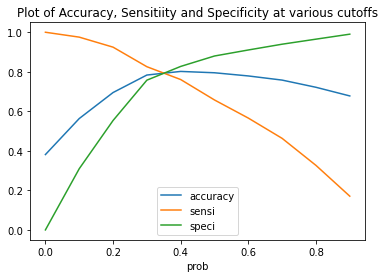

In [282]:
# Let's plot the accuracy, sensitivity and specificity for all cutoffs

cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.title("Plot of Accuracy, Sensitiity and Specificity at various cutoffs")
plt.show()

Based on the above graph we decide on cut off value as 0.34 which is intersecting point.

In [283]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Lead Number,,,,,,,,,,,,,
641410,0,0.546656,1,1,1,1,1,1,1,0,0,0,0
597687,0,0.069112,0,1,0,0,0,0,0,0,0,0,0
626825,0,0.343472,1,1,1,1,1,0,0,0,0,0,0
587928,0,0.779079,1,1,1,1,1,1,1,1,1,0,0
622366,0,0.227842,0,1,1,1,0,0,0,0,0,0,0


In [284]:
y_train_pred_final['Converted'].sum(), y_train_pred_final['predicted'].sum()

(2466, 2817)

In [285]:
# Accuracy
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7954545454545454

In [286]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
confusion

array([[3165,  837],
       [ 486, 1980]], dtype=int64)

In [287]:
# Sensitivity
# Define true/false positives/negatives

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
round(sensitivity,2)

0.8

Accuracy = ~80% and sensitivity=80%


In [288]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for Convertion')
    plt.legend(loc="lower right")
    plt.show()

    return None

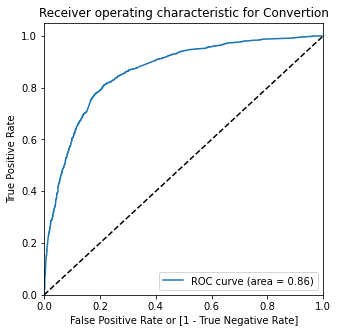

In [289]:
# Draw the ROC for the given model

draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

The ROC curve clearly shows a good tradeoff between sensitivity and specificity. That means we are able to predict more True Postivies with our model.

# 5. Predictions on the test data

In [290]:
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_Others,LastActivity_Page Visited on Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
619003,1.617188,0.964504,2.753447,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
636884,-1.093351,-0.885371,-1.201865,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
590281,0.600736,-0.777416,1.435010,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
579892,-1.093351,-0.885371,-1.201865,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
617929,-1.093351,-0.885371,-1.201865,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [291]:
y_test_pred = logreg11_model.predict(sm.add_constant(X_test[cols]))
y_test_pred

Lead Number
619003    0.625976
636884    0.897595
590281    0.245024
579892    0.058914
617929    0.936519
            ...   
583730    0.246963
639134    0.897595
595041    0.227842
608916    0.435913
631408    0.897595
Length: 2772, dtype: float64

In [292]:
y_test_pred_final = pd.DataFrame(y_test_pred)
y_test_pred_final.head()

,0
Lead Number,
619003,0.625976
636884,0.897595
590281,0.245024
579892,0.058914
617929,0.936519


In [293]:
y_test_pred_final.columns=['Converted_Prob']

In [294]:
y_test_pred_final.head()

,Converted_Prob
Lead Number,
619003,0.625976
636884,0.897595
590281,0.245024
579892,0.058914
617929,0.936519


In [295]:
y_test_pred_final['Converted'] = y_test

In [296]:
y_test_pred_final.reset_index(inplace=True)

In [297]:
y_test_pred_final.head()

,Lead Number,Converted_Prob,Converted
0,619003,0.625976,1
1,636884,0.897595,1
2,590281,0.245024,1
3,579892,0.058914,0
4,617929,0.936519,1


In [298]:
# Predict the convertion at the optimal cut off 0.34
y_test_pred_final['predicted'] = y_test_pred_final['Converted_Prob'].map(lambda x: 1 if x >0.34 else 0)
y_test_pred_final.head()

,Lead Number,Converted_Prob,Converted,predicted
0,619003,0.625976,1,1
1,636884,0.897595,1,1
2,590281,0.245024,1,0
3,579892,0.058914,0,0
4,617929,0.936519,1,1


In [299]:
# Accuracy
metrics.accuracy_score(y_pred=y_test_pred_final['predicted'], y_true=y_test_pred_final['Converted'])

0.7914862914862915

In [300]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred=y_test_pred_final['predicted'], y_true=y_test_pred_final['Converted'])
confusion2

array([[1320,  357],
       [ 221,  874]], dtype=int64)

In [301]:
# Sensitivity
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

sensitivity_pred = TP/(TP+FN)
sensitivity_pred

0.7981735159817351

In [302]:
y_test_pred_final['Lead Score'] = y_test_pred_final['Converted_Prob']*100
y_test_pred_final.head()

,Lead Number,Converted_Prob,Converted,predicted,Lead Score
0,619003,0.625976,1,1,62.597617
1,636884,0.897595,1,1,89.759543
2,590281,0.245024,1,0,24.502444
3,579892,0.058914,0,0,5.891438
4,617929,0.936519,1,1,93.651859


In [303]:
y_test_pred_final['Lead Score'].min(),y_test_pred_final['Lead Score'].max()

(0.44562862063495756, 99.83223523959998)

So in the test data we are able to get the sensitivity of ~80%.

Also we calculated the lead score for every lead which ranges between 0 and 100.

As we need to predict more True Positives, we have chooses Sensitivity as the metric over other metrics.

We are able to reach the sensitivity of ~80% as expected by CEO.

Below are the features that are used for predicting convertion of lead to a hot lead with 80% senitivity.

'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'LeadOrigin_API',
 'LeadOrigin_Lead Add Form',
 'LeadSource_Olark Chat',
 'LastActivity_Email Bounced',
 'LastActivity_Email Link Clicked',
 'LastActivity_Email Opened',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_Others',
 'LastActivity_Page Visited on Website',
 'Specialization_Not Selected',
 'City_Other Metro Cities'